#**Mass Runs**
##Standard Settings
**Particle = $^{199}Hg$**

**Gyromagnetic ratio = $-4.84578839927 \times 10^7\,\frac{1}{T s}$**

**Magnetic field ($B_0$) = $1\,\mu T$**

**Electric field ($E_0$) = $1\,\frac{MV}{m}$**

**Precession time = $100\,s$**

**Chamber height = $12\,cm$**

**Chamber radius = $23.5\,cm$**

**3D simulations**

**Each point represents the results of 10000 particles.  Parallel configuration shown by default**

In [2]:
%matplotlib inline
import srkdata
import srkmisc
import matplotlib.pyplot as plt
import numpy as np
import math
import srkgraphics
import srkanalysis
from scipy.optimize import curve_fit
from matplotlib.legend_handler import HandlerLine2D
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
rcParams['xtick.labelsize'] = 20
graphs_dir='/home/mjbales/work/nedm/graphs/'

import ROOT
from ROOT import TF1,gPad,gStyle,TCanvas,TH1D,gROOT
import rootnotes
import rootprint
gStyle.SetOptFit()
gStyle.SetOptStat(0)
gROOT.ForceStyle();
c1=rootnotes.canvas("Canvas", (1200, 800))
c1.SetRightMargin(0.3)
histogram = TH1D("phi_hist","phi_hist",100,-5,5)
histogram2 = TH1D("phi_hist2","phi_hist2",100,-5,5)
histogram3 = TH1D("phi_hist3","phi_hist3",100,-5,5)
plot_types=['PhiMean','PhiStDev','PhiKurtosis','PhiSkewness','PhiTsallisPower','ThetaMean','ThetaStDev','ThetaKurtosis','ThetaSkewness','ThetaTsallisPower','SZDetProb']
y_axis_titles=['Mean Phi (radians)', 'Phi Standard Deviation (radians)','Phi Kurtosis (0=Gaussian)', 'Phi Skewness (0=Centered)','Phi Tsallis Power (>30 ~ Gauss)',
    'Mean Theta (radians)', 'Theta Standard Deviation (radians)','Theta Kurtosis (0=Gaussian)', 'Theta Skewness (0=Centered)','Theta Tsallis Power (>30 ~ Gauss)', "Opposite spin detection probability"]
legend_titles = ["Parallel","AntiParallel"]
colors=['blue','red']
linestyles=['-','--']

##Radius

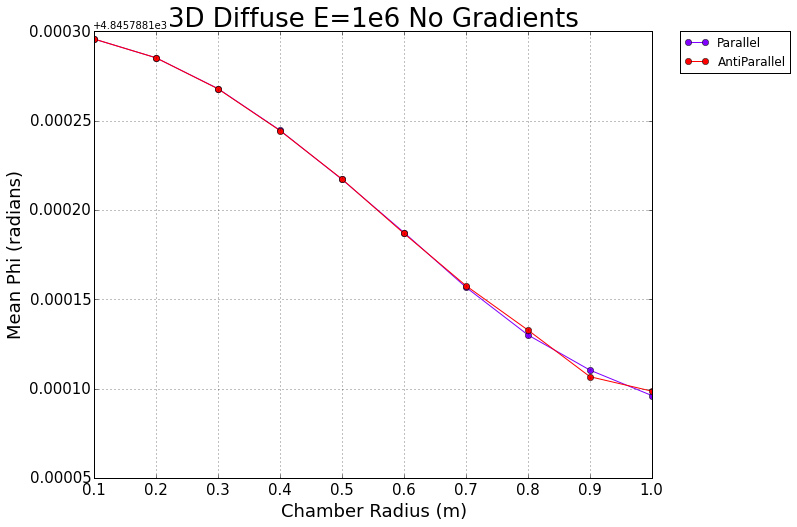

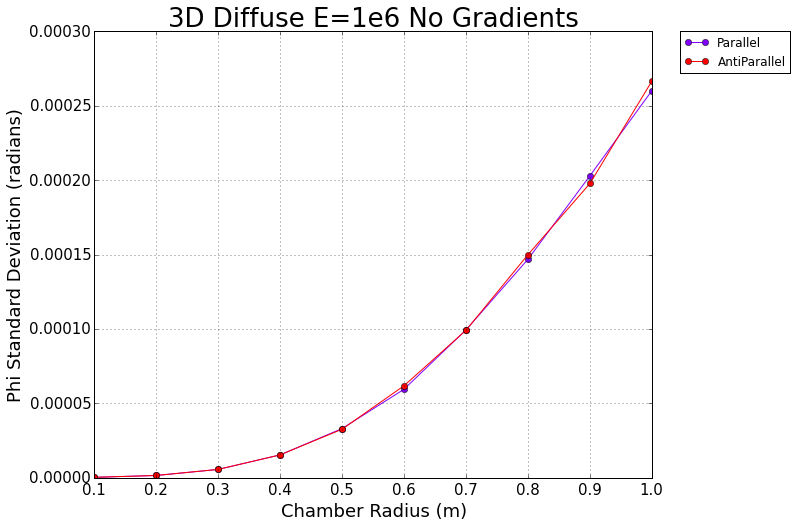

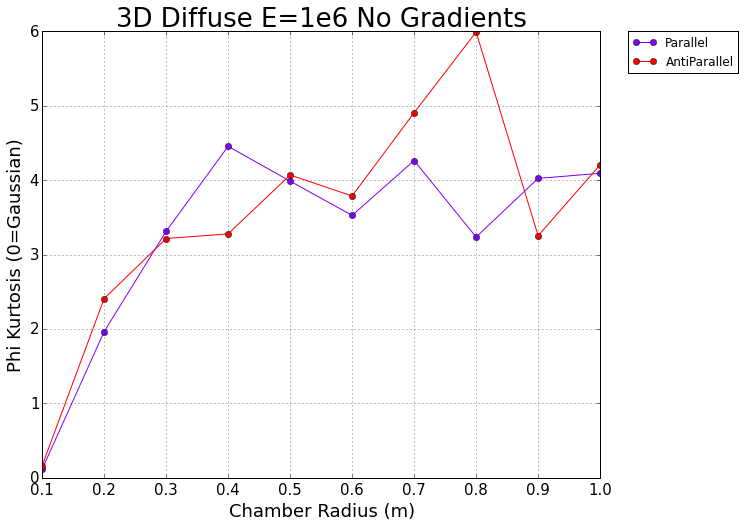

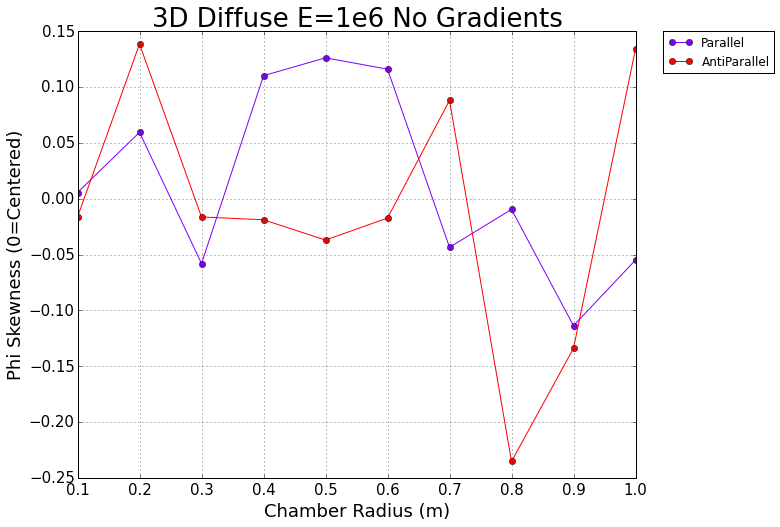

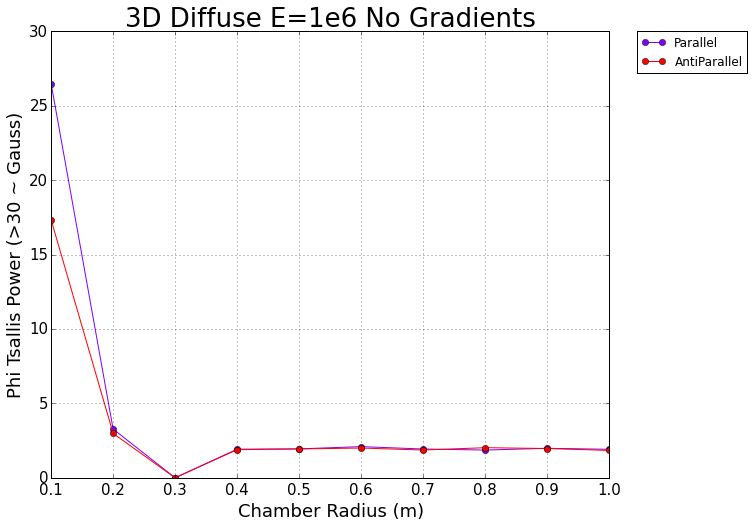

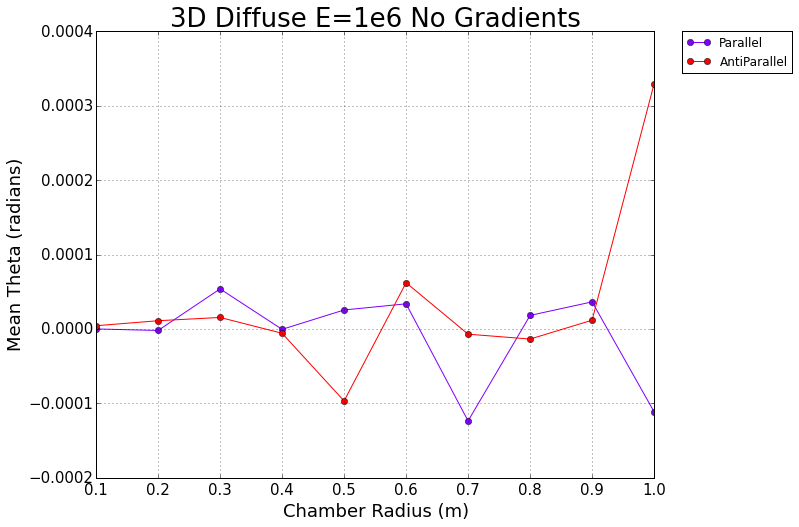

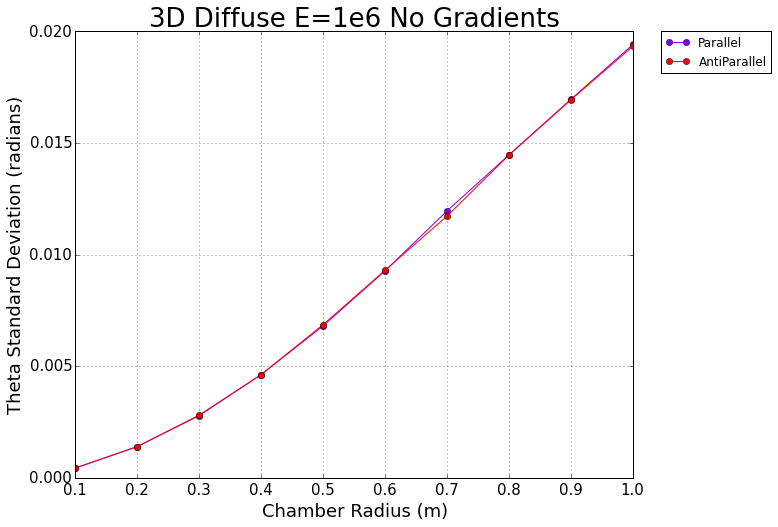

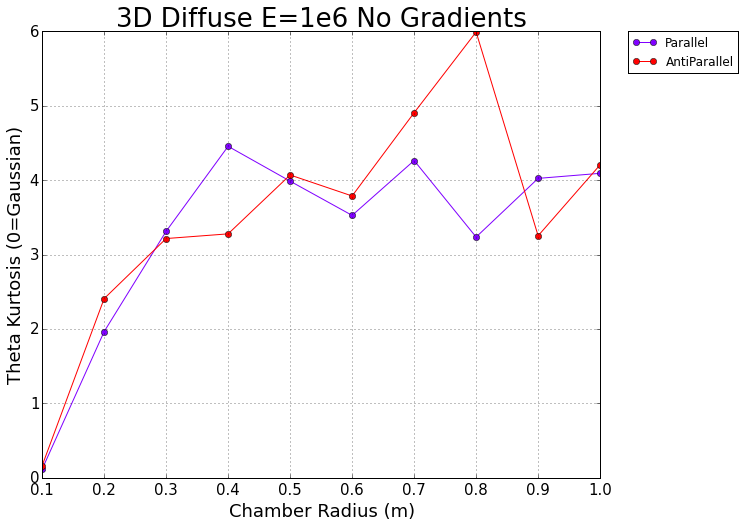

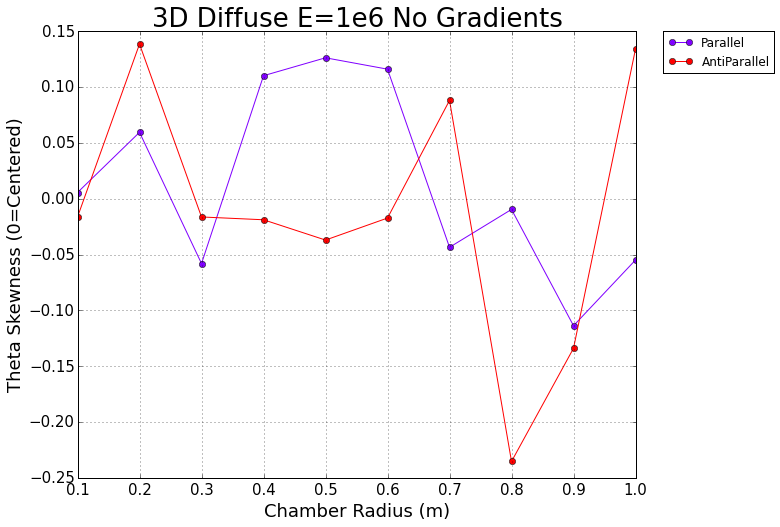

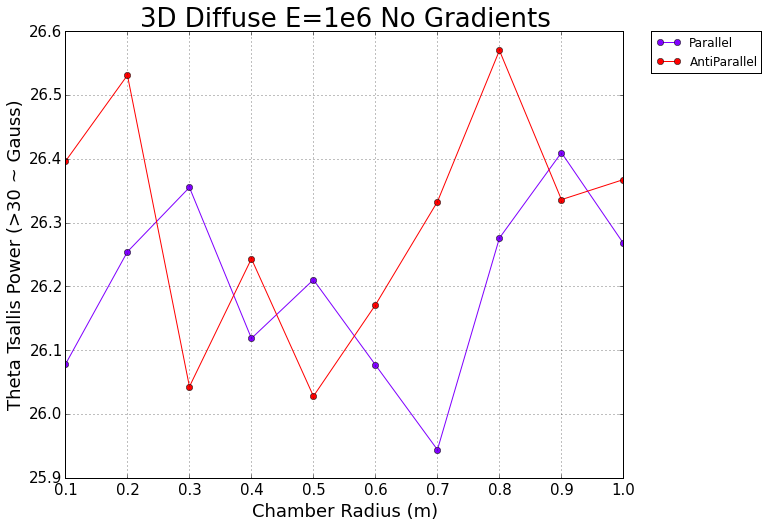

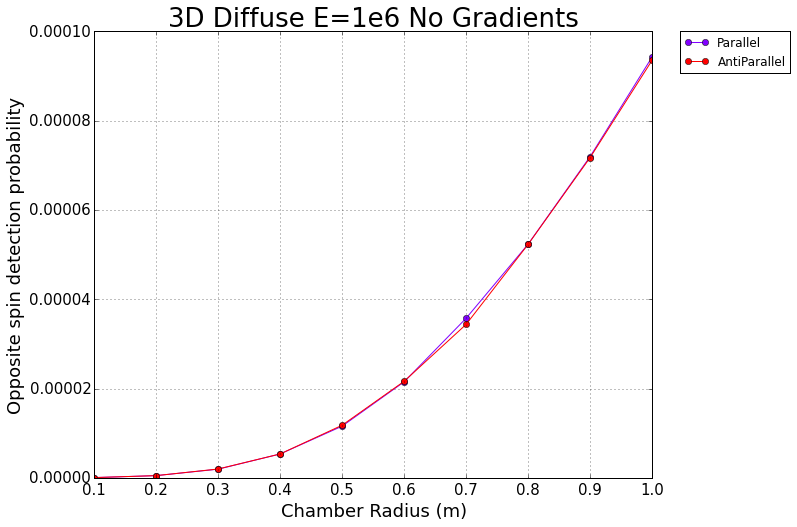

In [7]:
variable = 'ChamberRadius'
main_title = '3D Diffuse E=1e6 No Gradients'
x_axis_title = 'Chamber Radius (m)'
lambda_func=[lambda x:x,lambda x:x,lambda x:x,lambda x:x]
lines = [range(5520, 5530)]

for i in range(len(plot_types)):
    plot_type=plot_types[i]
    y_axis_title=y_axis_titles[i]
    data=[]
    for config_type in ['Par',"Anti"]:
        full_plot_type=config_type + "_" +plot_type
        titles=[main_title,x_axis_title,y_axis_title]
        data += srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
    srkgraphics.make_plot_from_data(data, titles=titles, legend_titles=legend_titles,lambda_func=lambda_func)
#     plt.yscale('log', noncvposy='clip')
#     plt.xscale('log', noncvposy='clip')c
    plt.savefig("/home/mjbales/work/nedm/graphs/MassRuns151103"+plot_type+"vs"+variable+".svg", bbox_inches='tight')
    plt.show()
                        


##Chamber Height

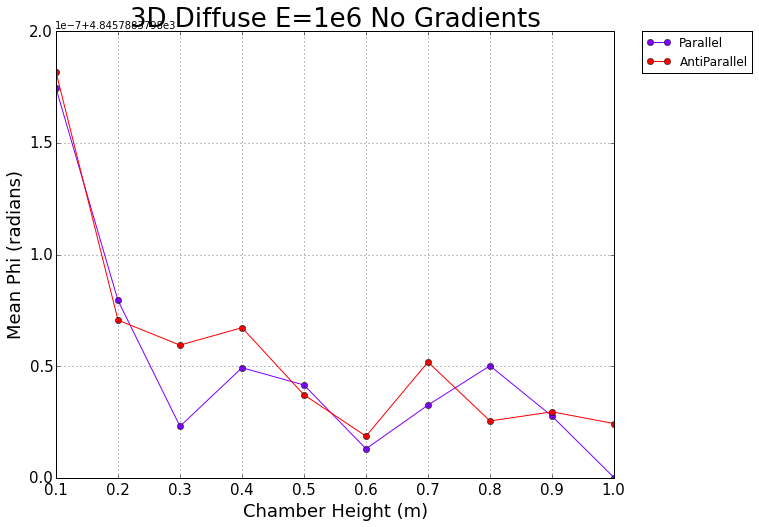

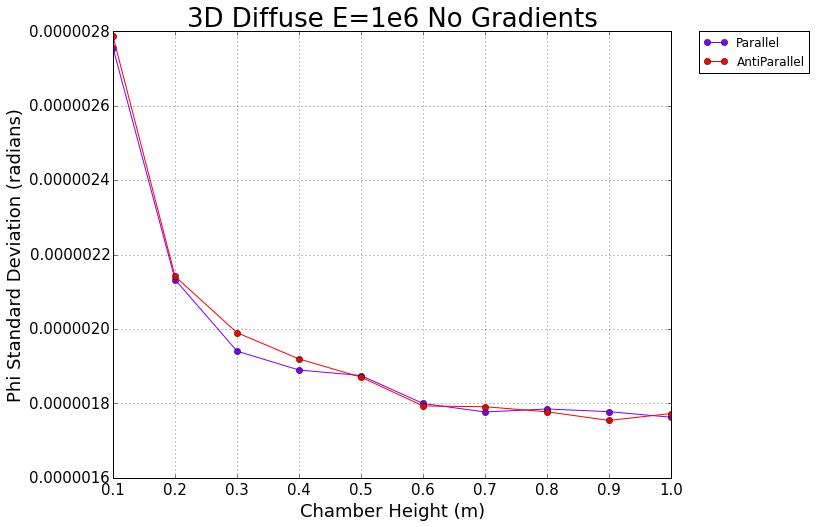

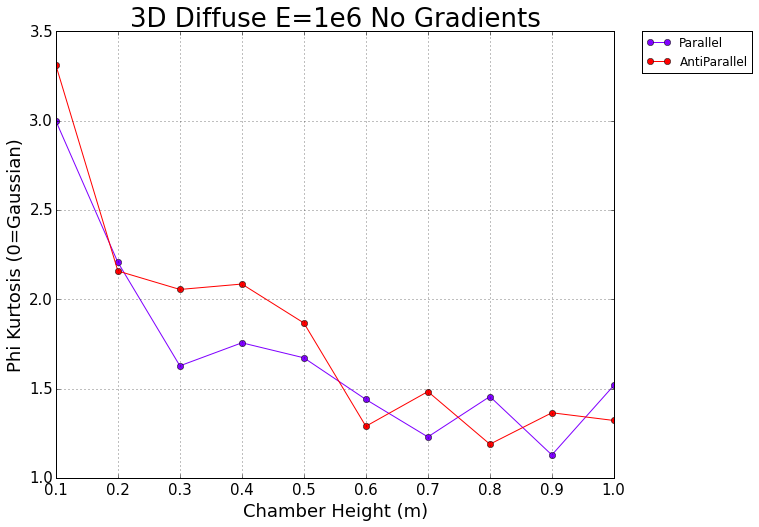

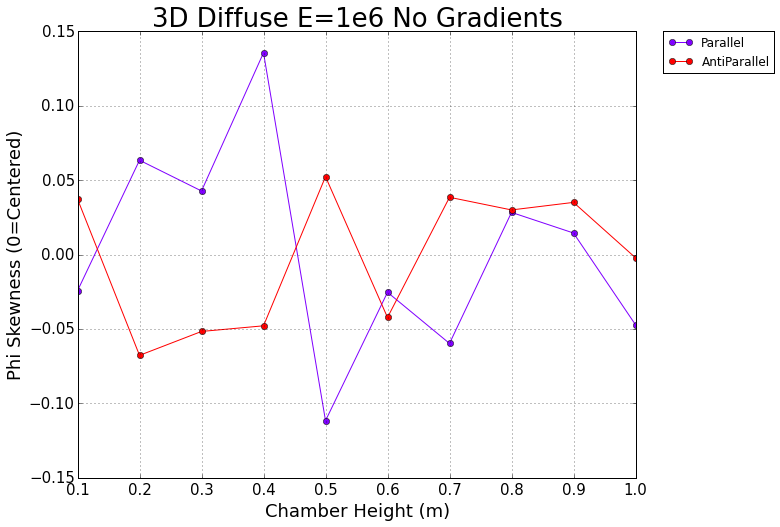

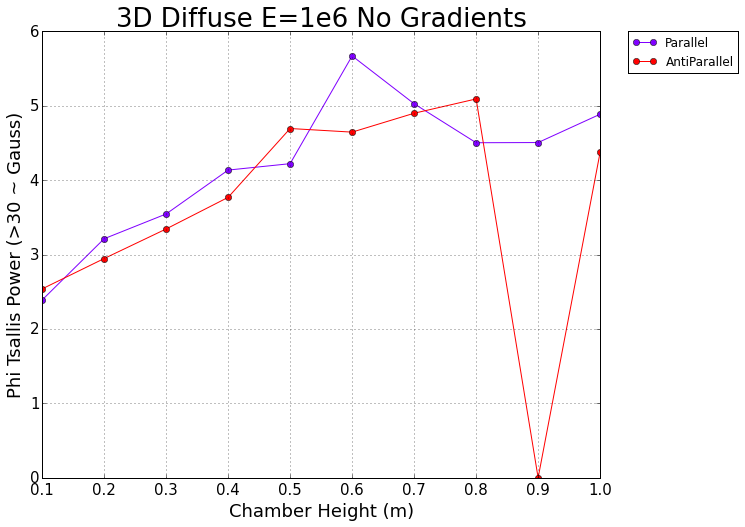

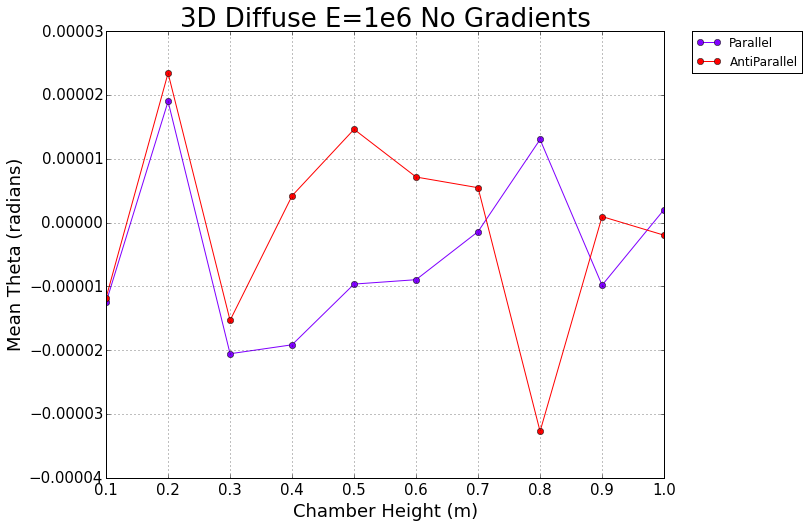

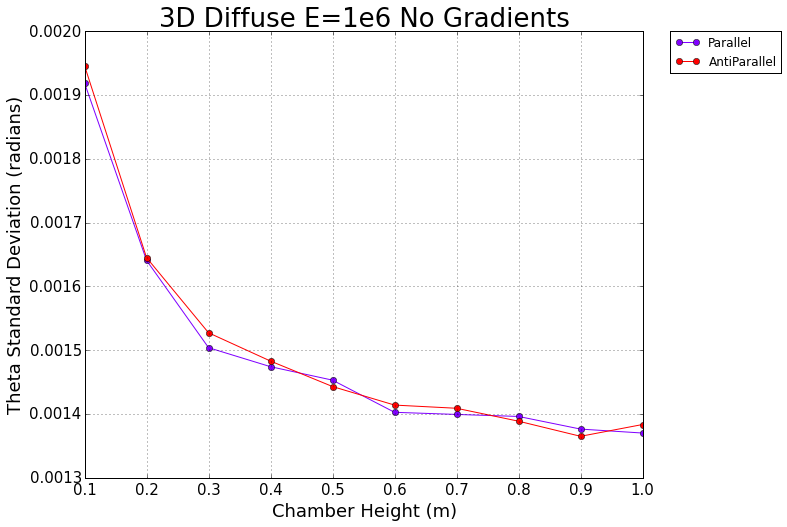

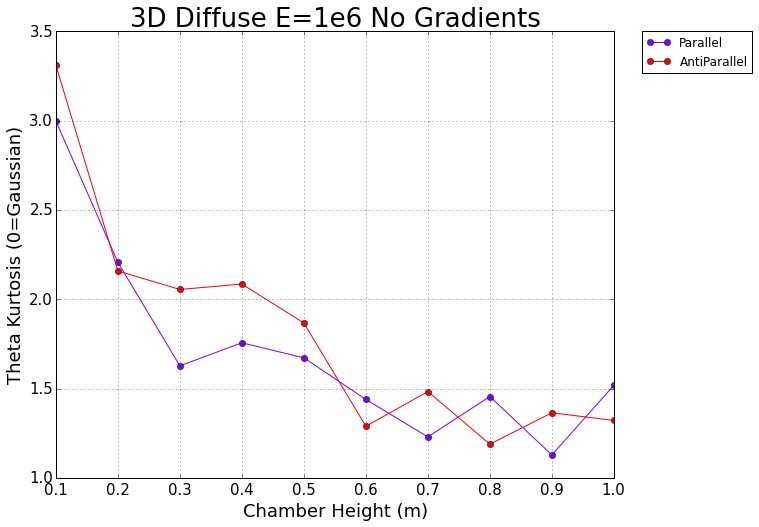

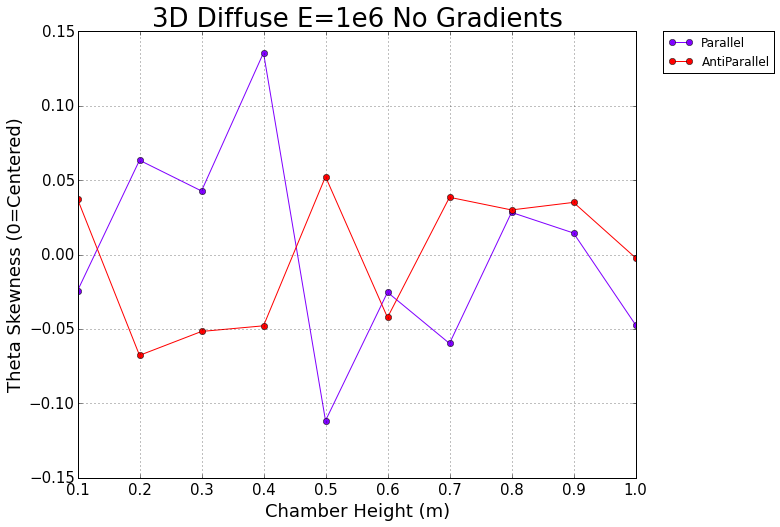

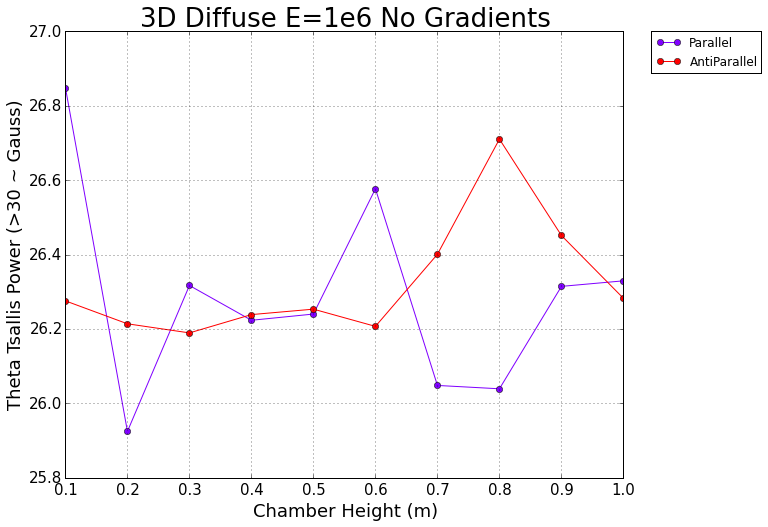

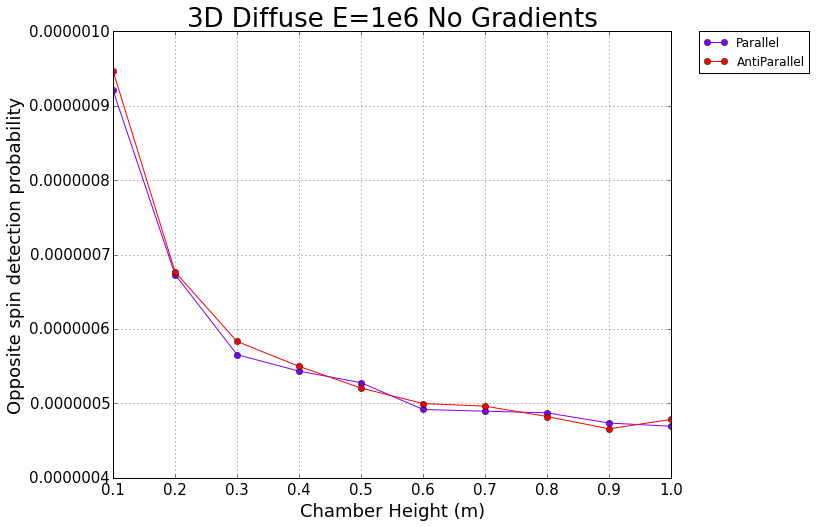

In [6]:
variable = 'ChamberHeight'
main_title = '3D Diffuse E=1e6 No Gradients'
x_axis_title = 'Chamber Height (m)'
lambda_func=[lambda x:x,lambda x:x,lambda x:x,lambda x:x]
lines = [range(5530, 5540)]

for i in range(len(plot_types)):
    plot_type=plot_types[i]
    y_axis_title=y_axis_titles[i]
    data=[]
    for config_type in ['Par',"Anti"]:
        full_plot_type=config_type + "_" +plot_type
        titles=[main_title,x_axis_title,y_axis_title]
        data += srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
    srkgraphics.make_plot_from_data(data, titles=titles, legend_titles=legend_titles,lambda_func=lambda_func)
#     plt.yscale('log', noncvposy='clip')
#     plt.xscale('log', noncvposy='clip')c
    plt.savefig("/home/mjbales/work/nedm/graphs/MassRuns151103"+plot_type+"vs"+variable+".svg", bbox_inches='tight')
    plt.show()
                        


##Diffuse Reflection Probability

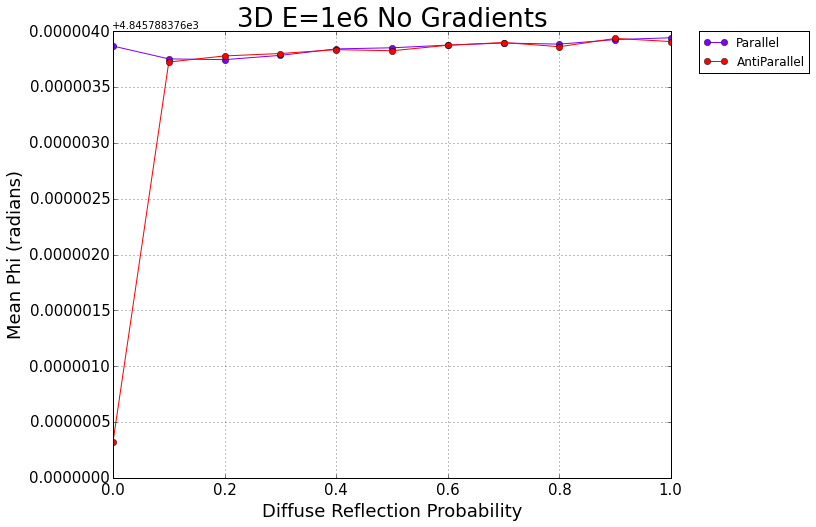

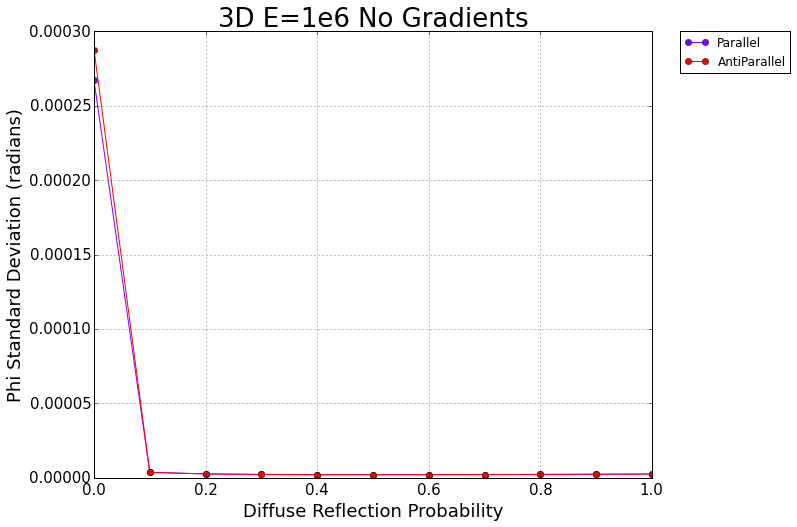

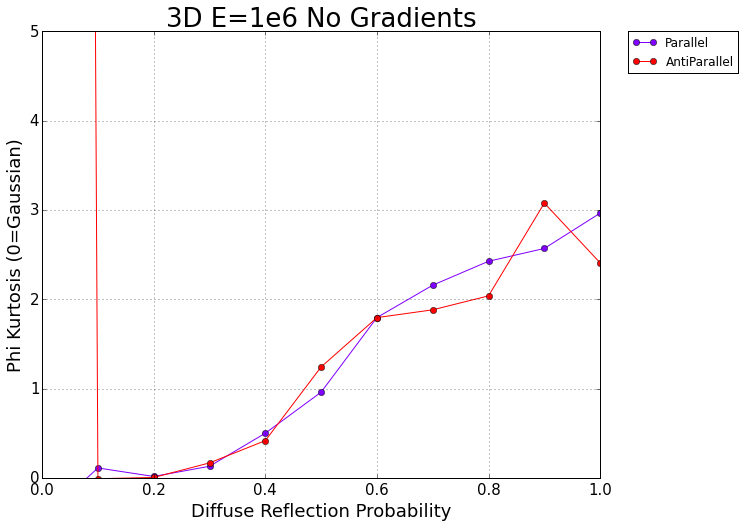

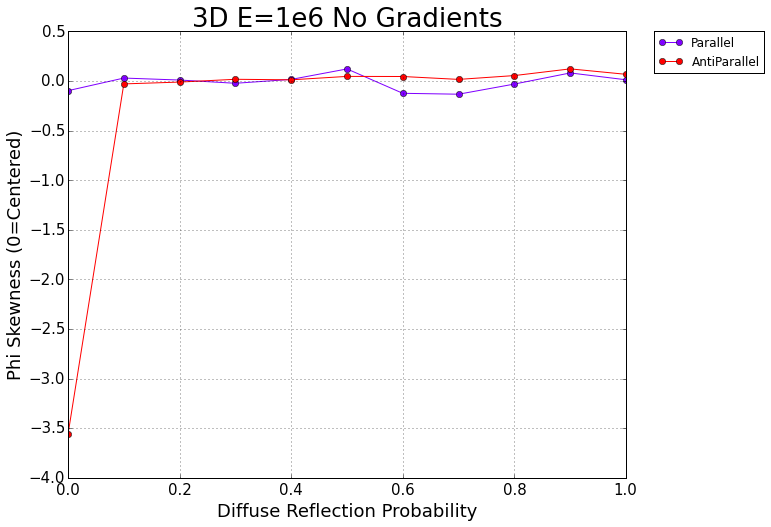

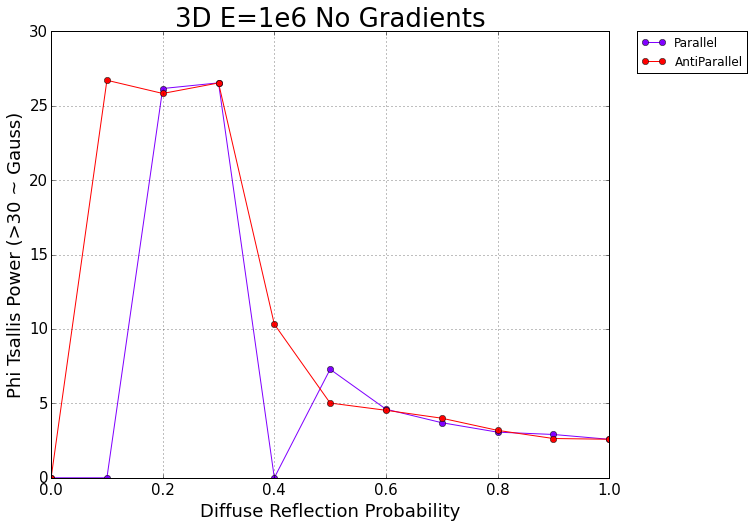

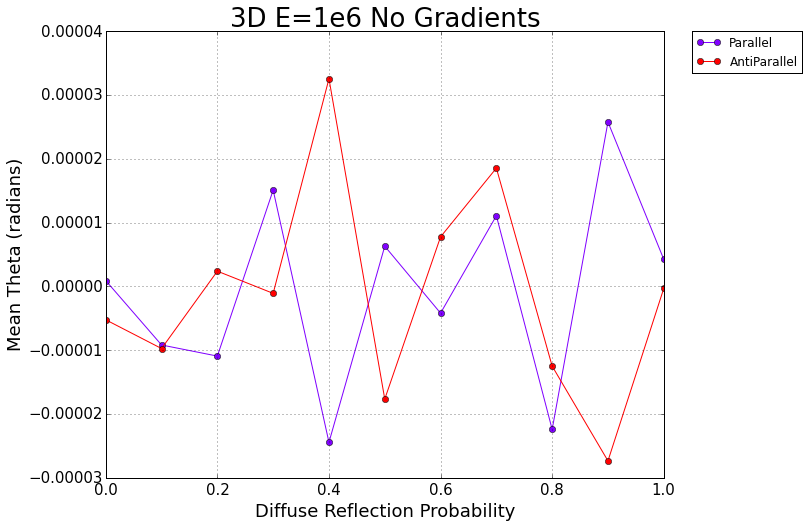

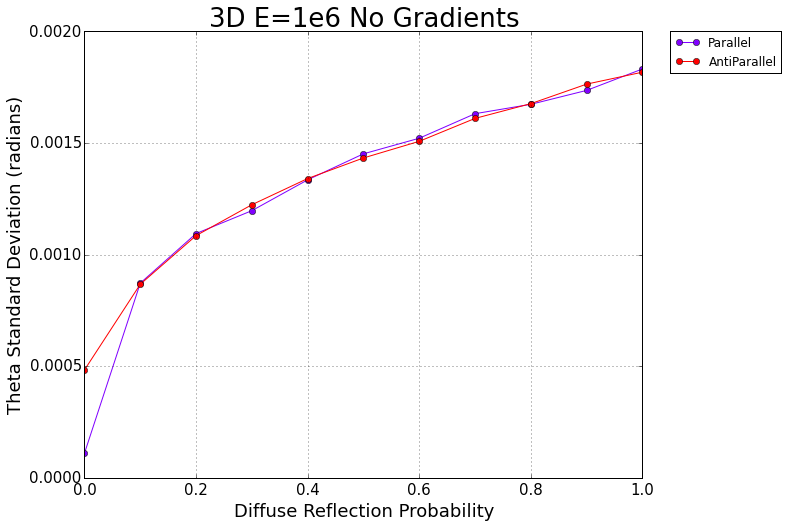

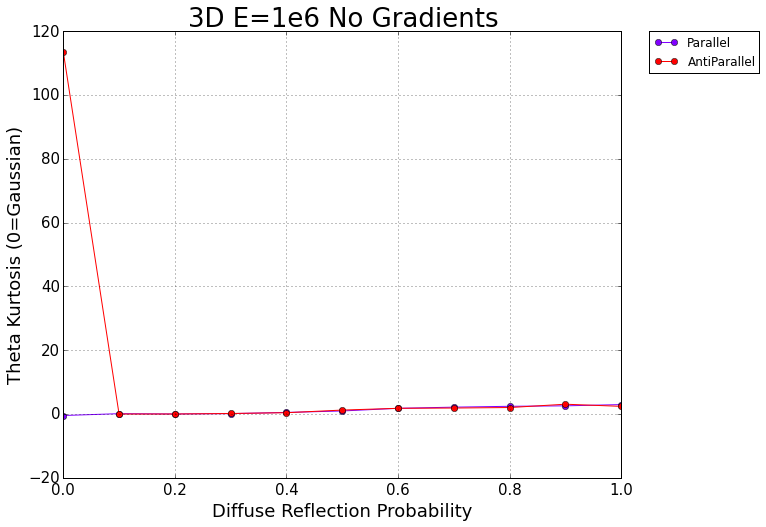

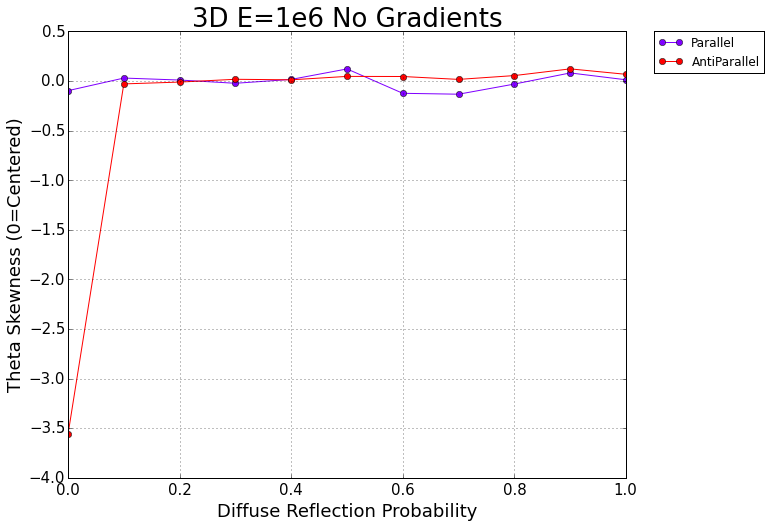

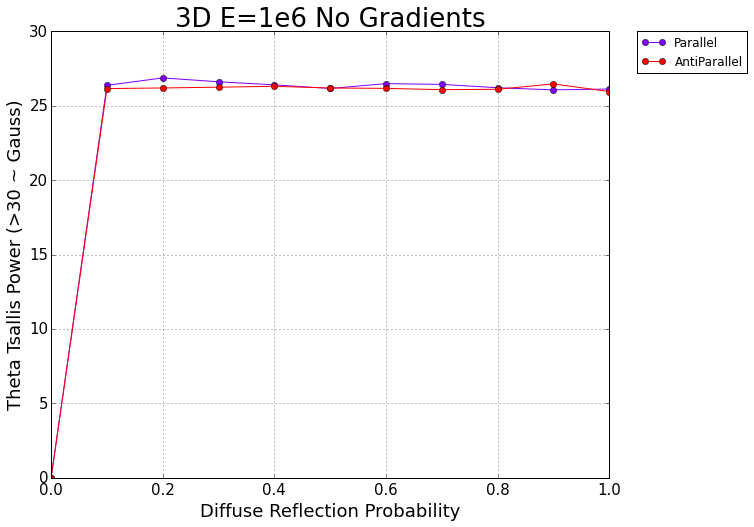

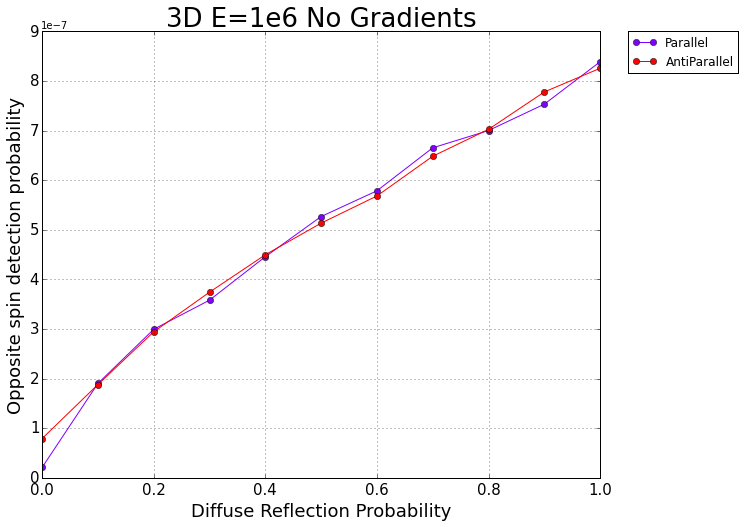

In [2]:
variable = 'DiffuseReflectionProb'
main_title = '3D E=1e6 No Gradients'
x_axis_title = 'Diffuse Reflection Probability'
lambda_func=[lambda x:x,lambda x:x,lambda x:x,lambda x:x]
lines = [range(5540, 5551)]

for i in range(len(plot_types)):
    plot_type=plot_types[i]
    y_axis_title=y_axis_titles[i]
    data=[]
    for config_type in ['Par',"Anti"]:
        full_plot_type=config_type + "_" +plot_type
        titles=[main_title,x_axis_title,y_axis_title]
        data += srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
    srkgraphics.make_plot_from_data(data, titles=titles, legend_titles=legend_titles,lambda_func=lambda_func)
#     plt.yscale('log', noncvposy='clip')
#     plt.xscale('log', noncvposy='clip')c
    if plot_type=='PhiKurtosis':
        plt.axis([ 0, 1,0, 5])
    plt.savefig("/home/mjbales/work/nedm/graphs/MassRuns151103"+plot_type+"vs"+variable+".svg", bbox_inches='tight')
    plt.show()
                        


##Vary B Field

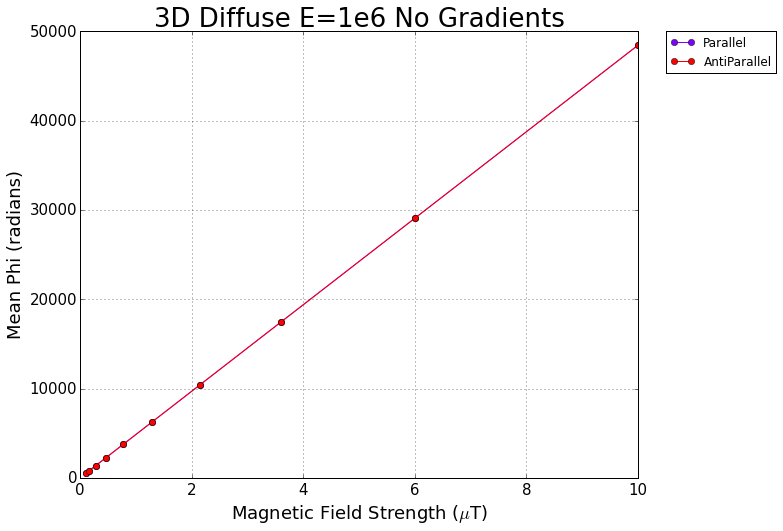

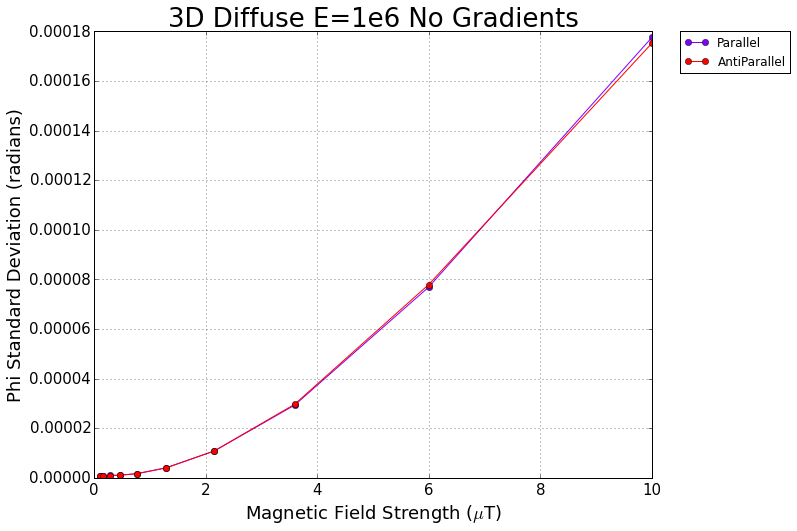

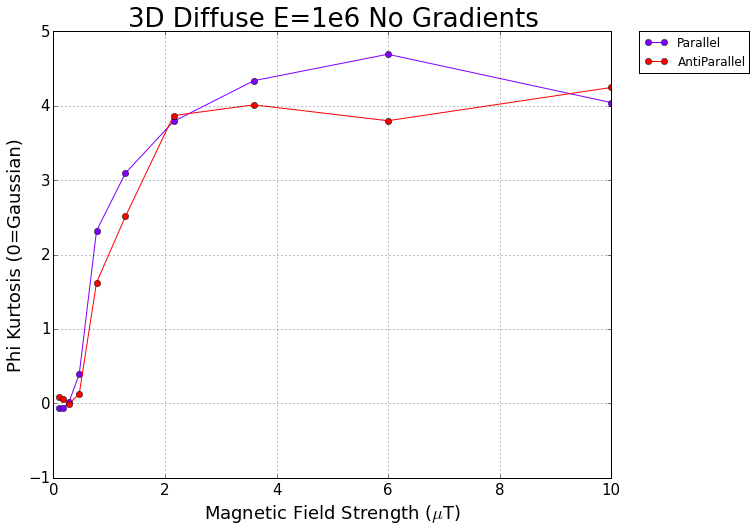

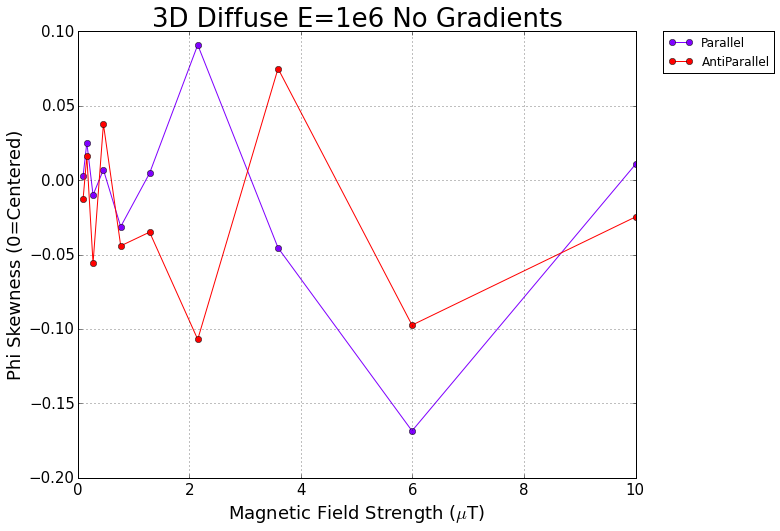

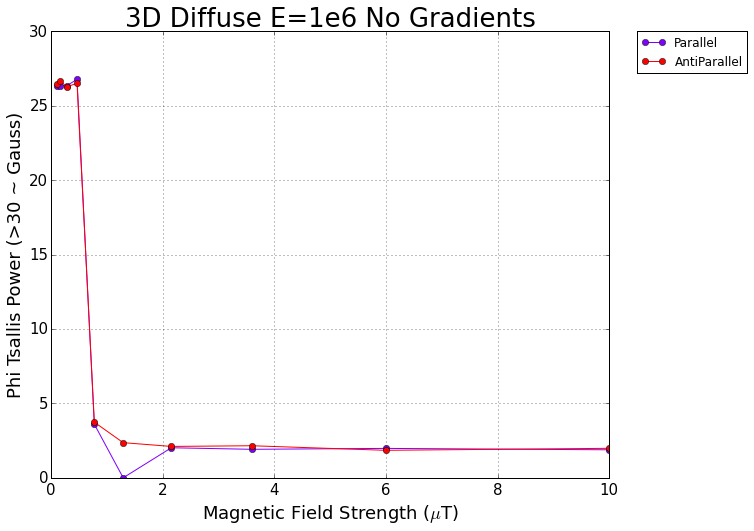

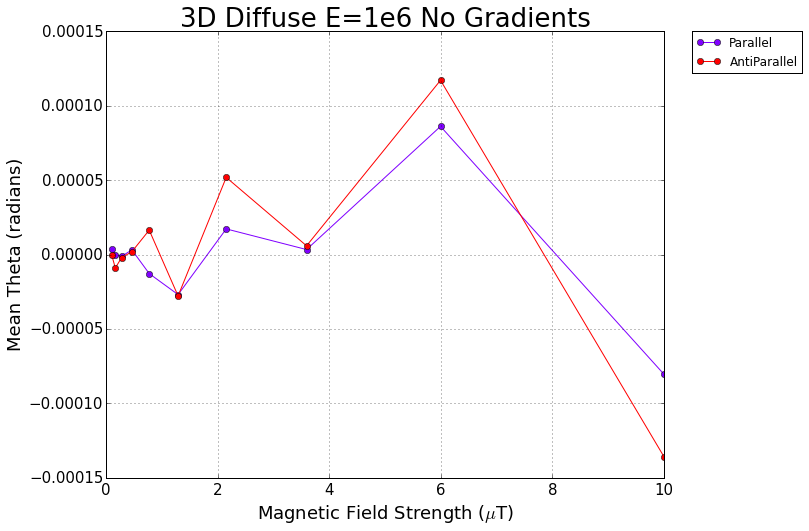

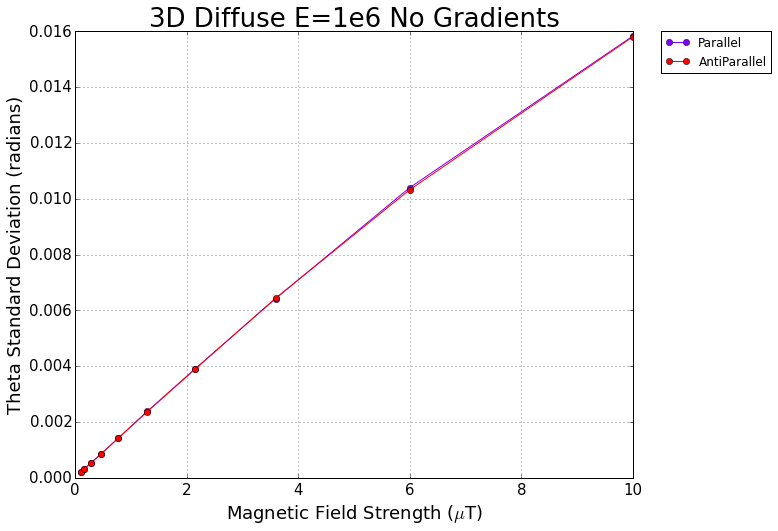

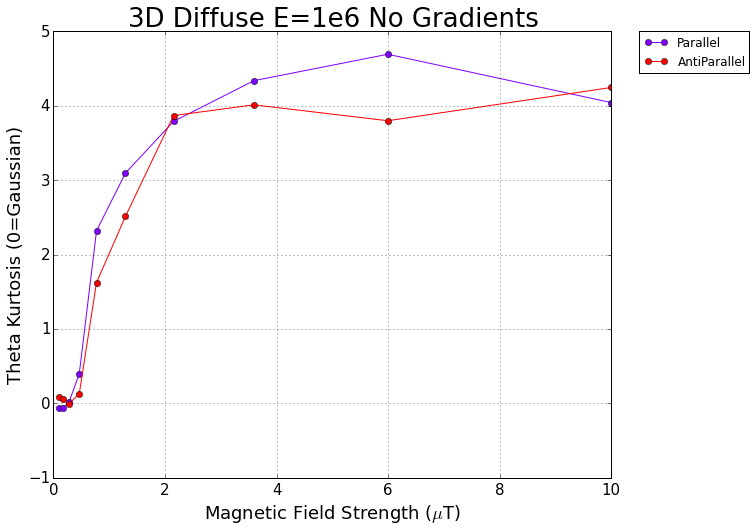

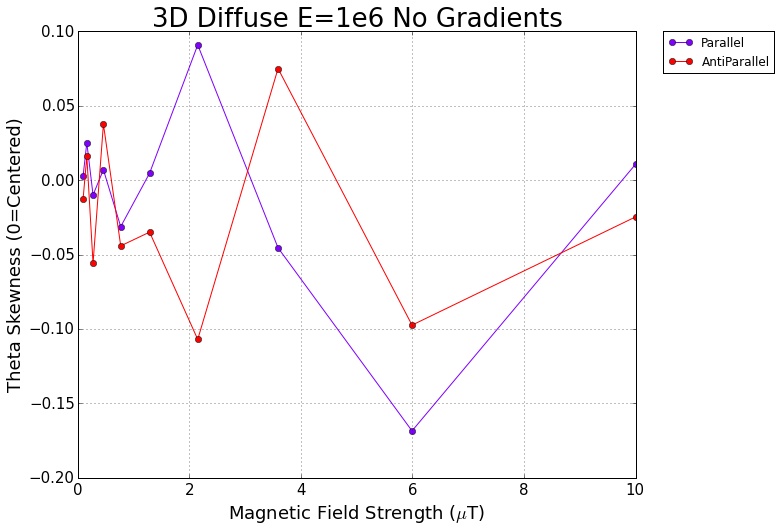

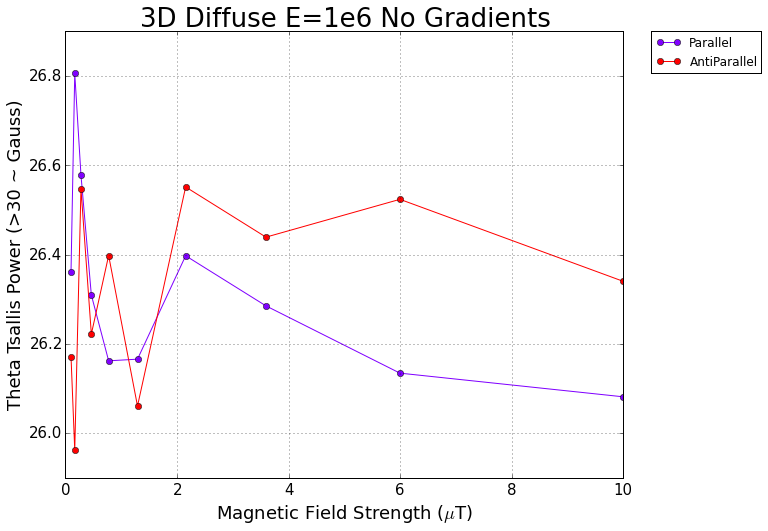

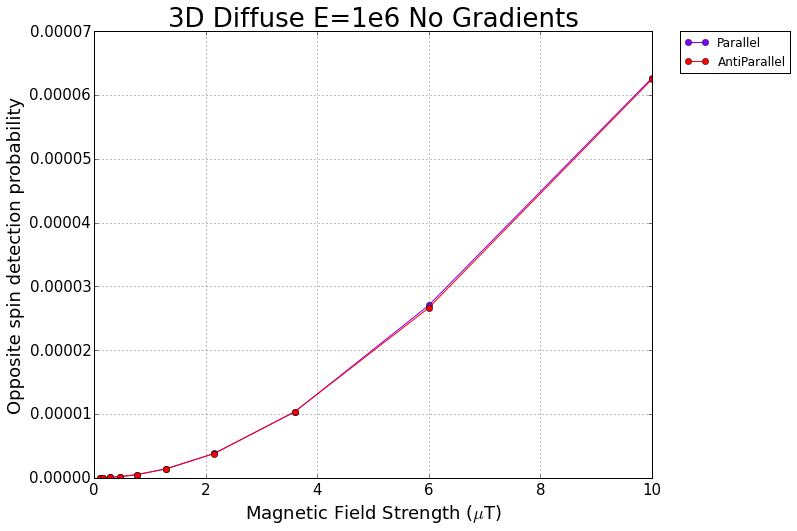

In [17]:
variable = 'B0FieldStrength'
main_title = '3D Diffuse E=1e6 No Gradients'
x_axis_title = r'Magnetic Field Strength ($\mu$T)'
lambda_func=[lambda x:x*1e6,lambda x:x,lambda x:x*1e6,lambda x:x]
lines = [range(5551, 5561)]

for i in range(len(plot_types)):
    plot_type=plot_types[i]
    y_axis_title=y_axis_titles[i]
    data=[]
    for config_type in ['Par',"Anti"]:
        full_plot_type=config_type + "_" +plot_type
        titles=[main_title,x_axis_title,y_axis_title]
        data += srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
    srkgraphics.make_plot_from_data(data, titles=titles, legend_titles=legend_titles,lambda_func=lambda_func)
#     plt.yscale('log', noncvposy='clip')
#     plt.xscale('log', noncvposy='clip')
    plt.savefig("/home/mjbales/work/nedm/graphs/MassRuns151103"+plot_type+"vs"+variable+".svg", bbox_inches='tight')
    plt.show()
                        


##Vary E Field

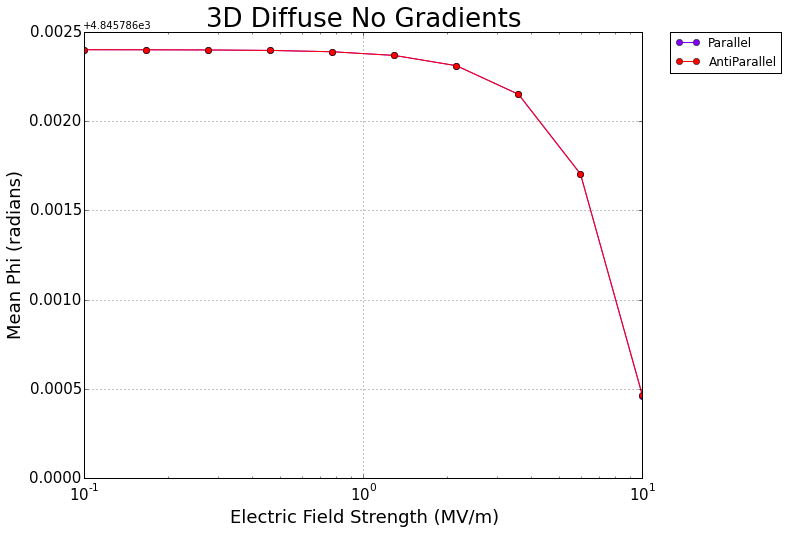

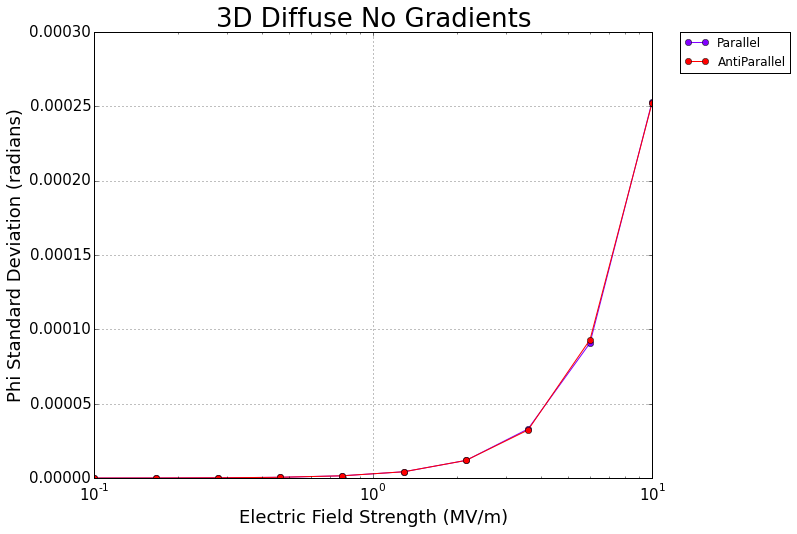

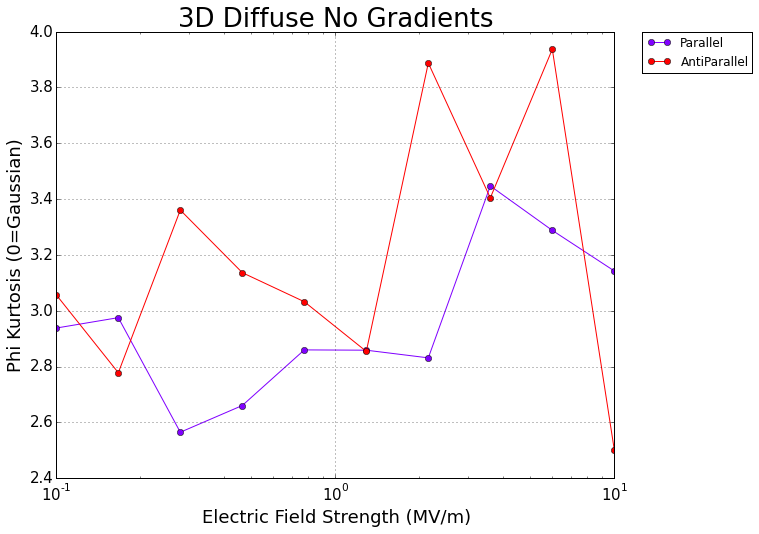

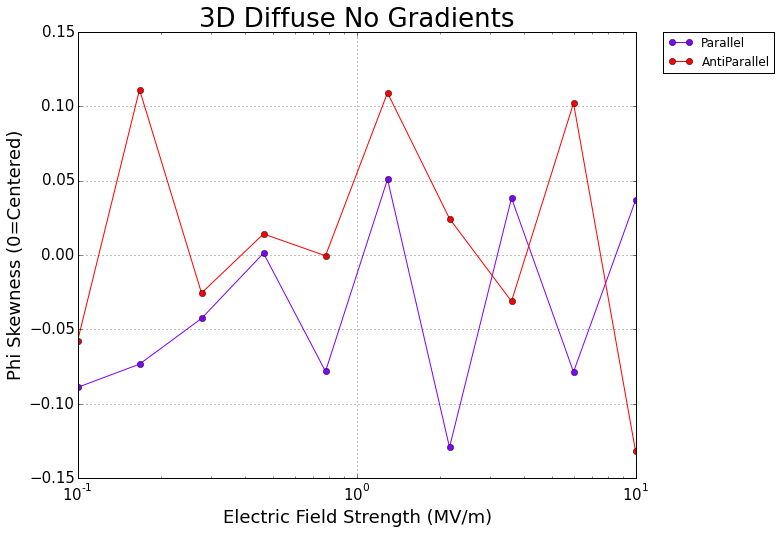

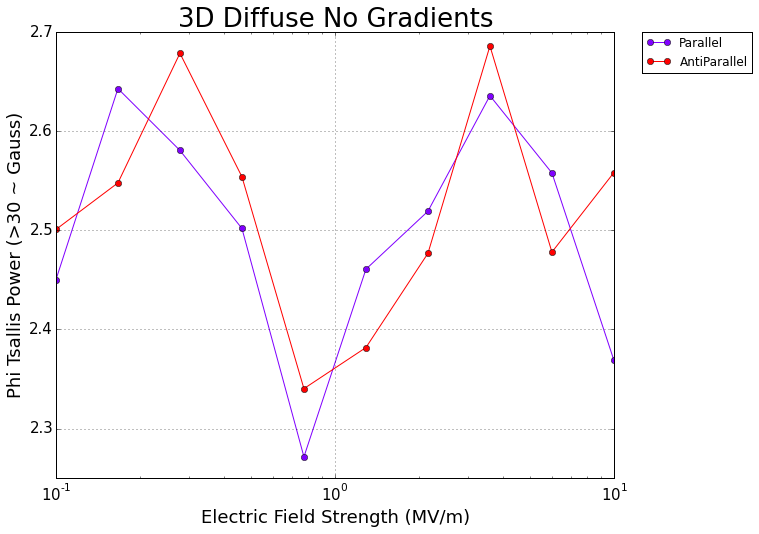

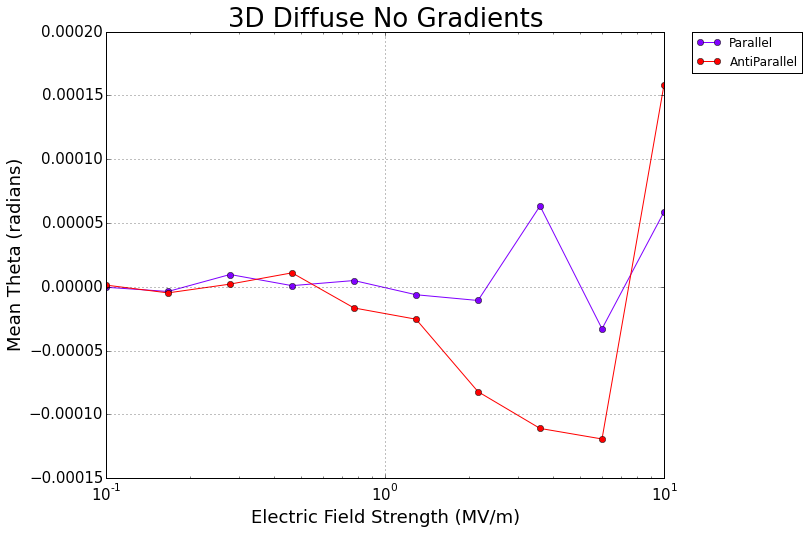

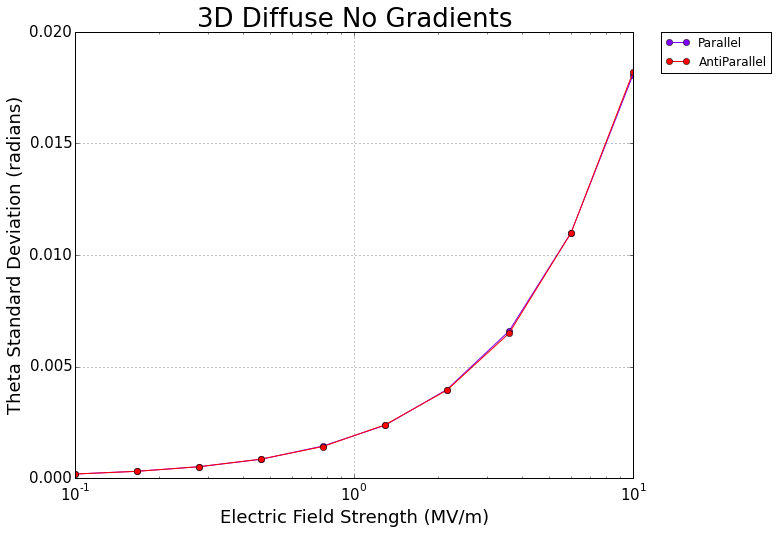

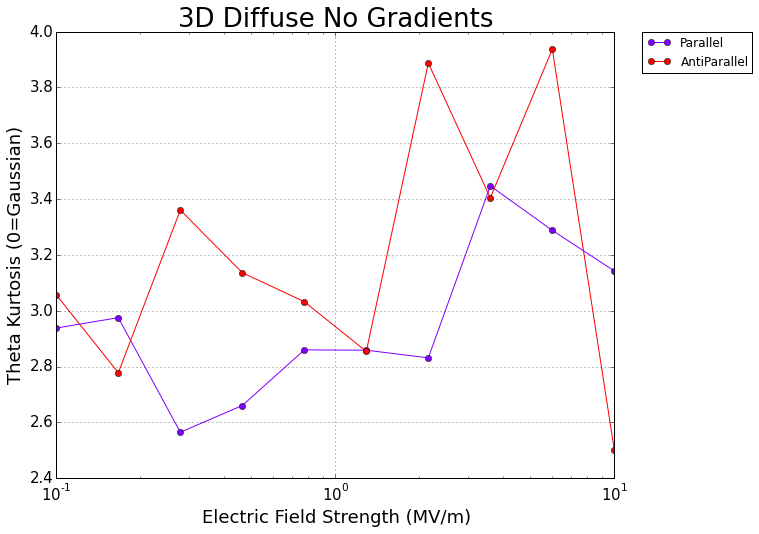

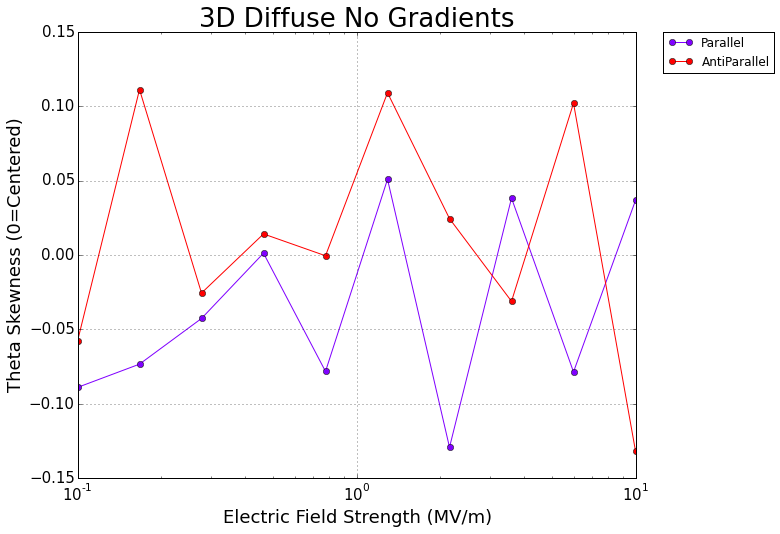

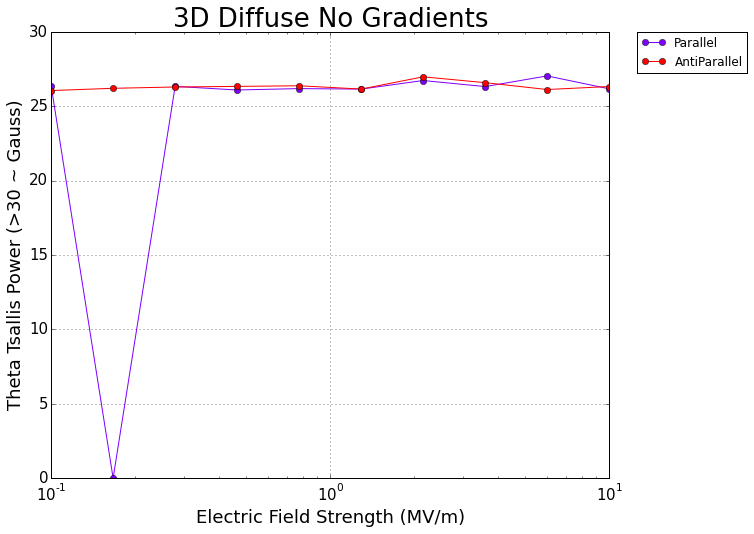

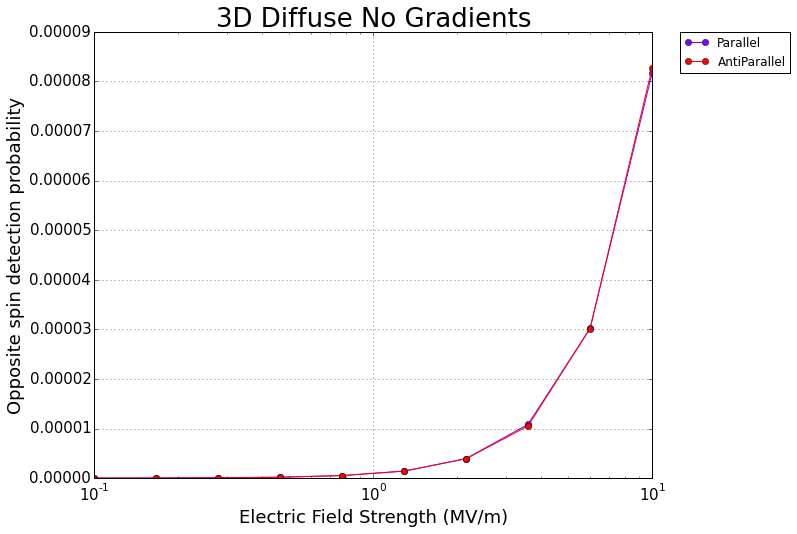

In [6]:
variable = 'E0FieldStrength'
main_title = '3D Diffuse No Gradients'
x_axis_title = r'Electric Field Strength (MV/m)'
lambda_func=[lambda x:x*1e-6,lambda x:x,lambda x:x*1e-6,lambda x:x]
lines = [range(5561, 5571)]

for i in range(len(plot_types)):
    plot_type=plot_types[i]
    y_axis_title=y_axis_titles[i]
    data=[]
    for config_type in ['Par',"Anti"]:
        full_plot_type=config_type + "_" +plot_type
        titles=[main_title,x_axis_title,y_axis_title]
        data += srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
    srkgraphics.make_plot_from_data(data, titles=titles, legend_titles=legend_titles,lambda_func=lambda_func)
#     plt.yscale('log', noncvposy='clip')
    plt.xscale('log', noncvposy='clip')
    plt.savefig("/home/mjbales/work/nedm/graphs/MassRuns151103"+plot_type+"vs"+variable+".svg", bbox_inches='tight')
    plt.show()
                        


##Vary Time Limit

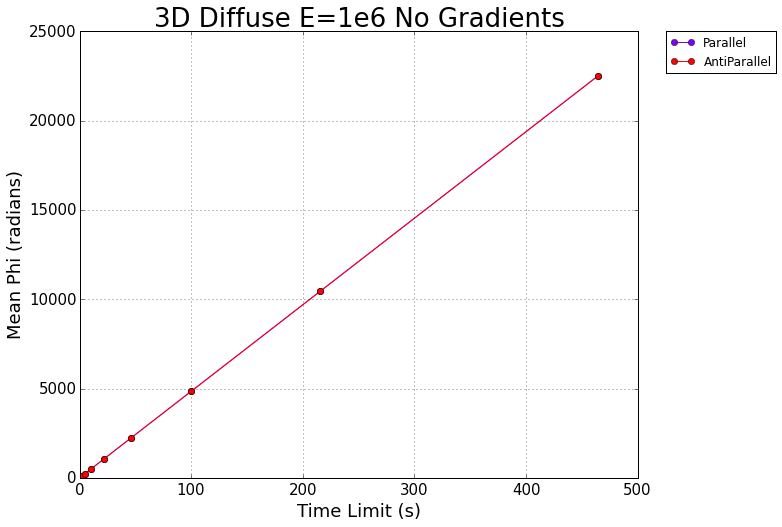

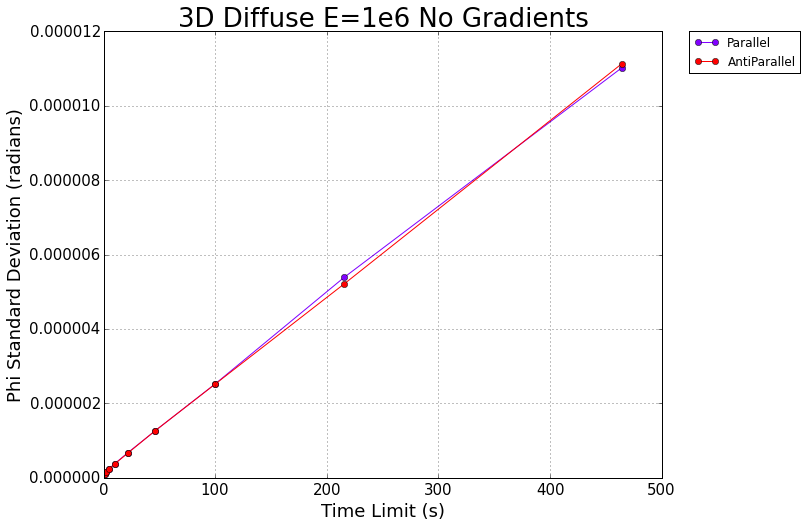

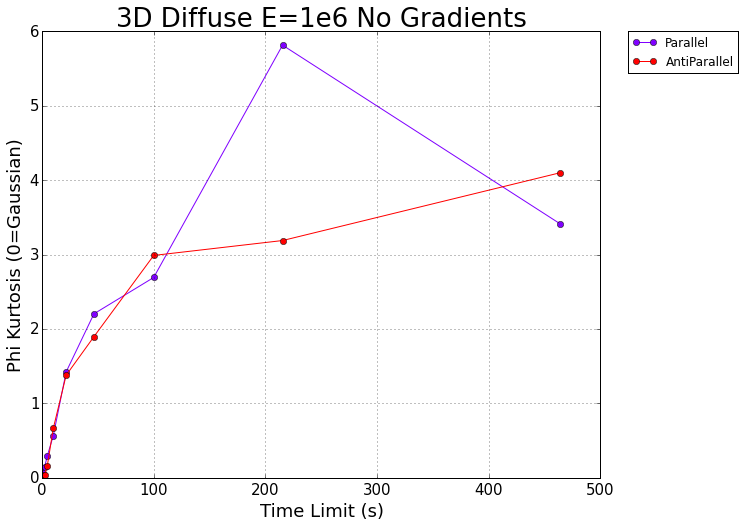

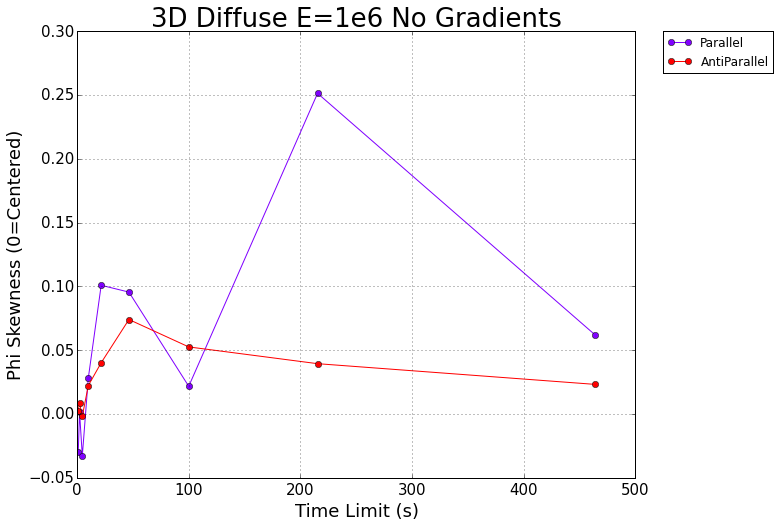

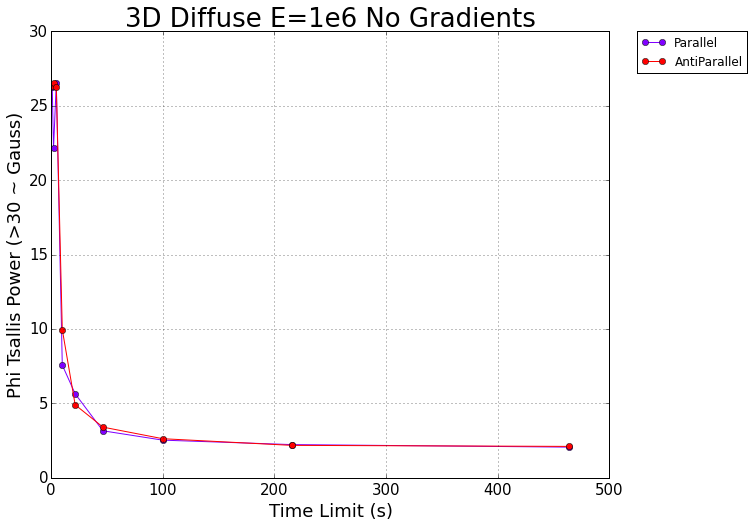

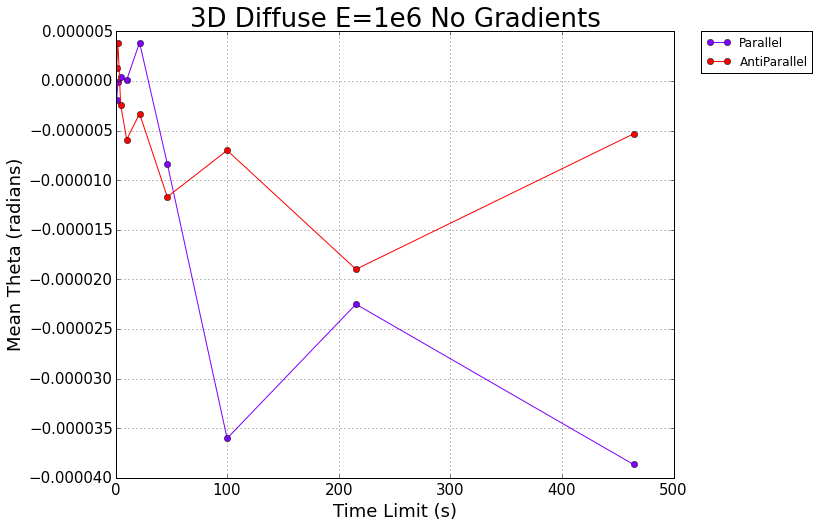

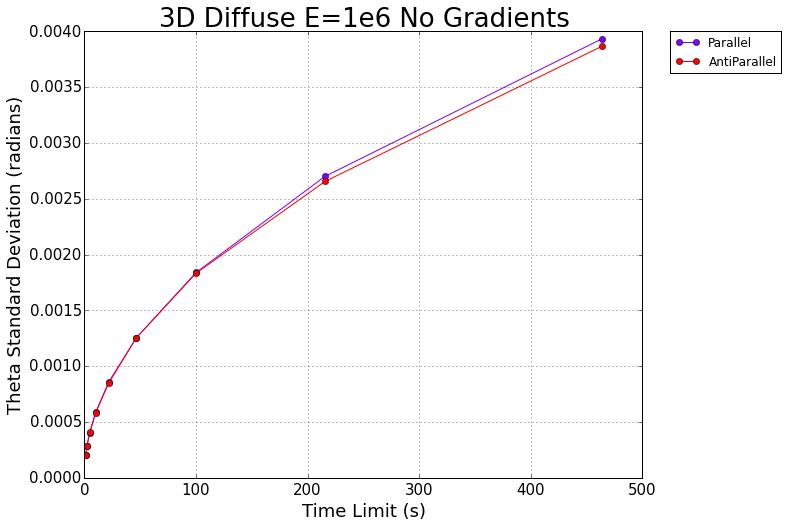

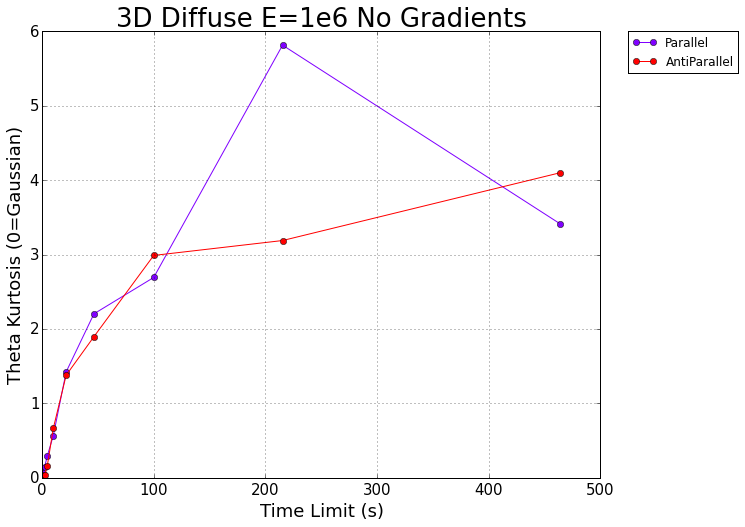

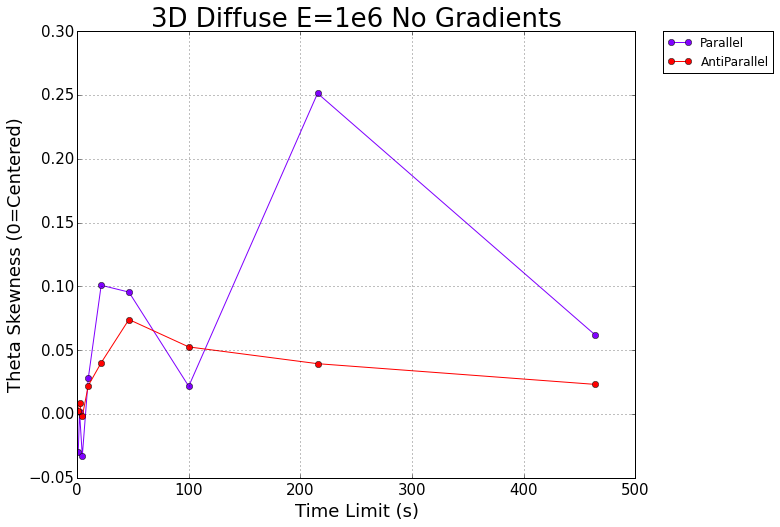

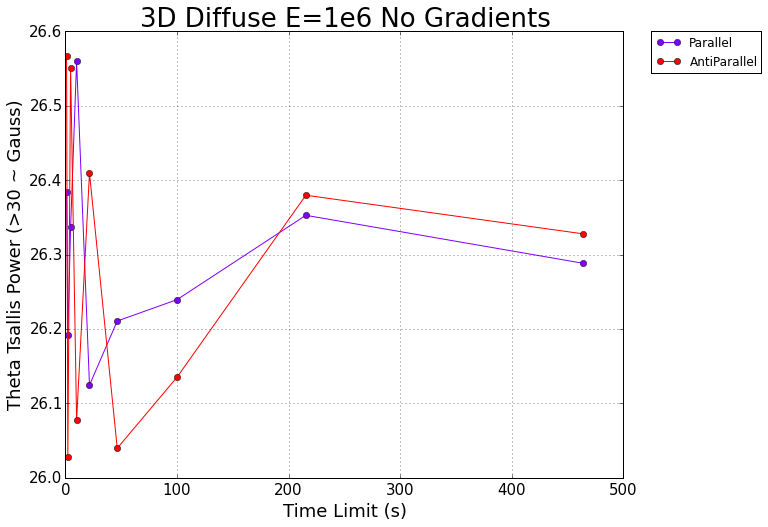

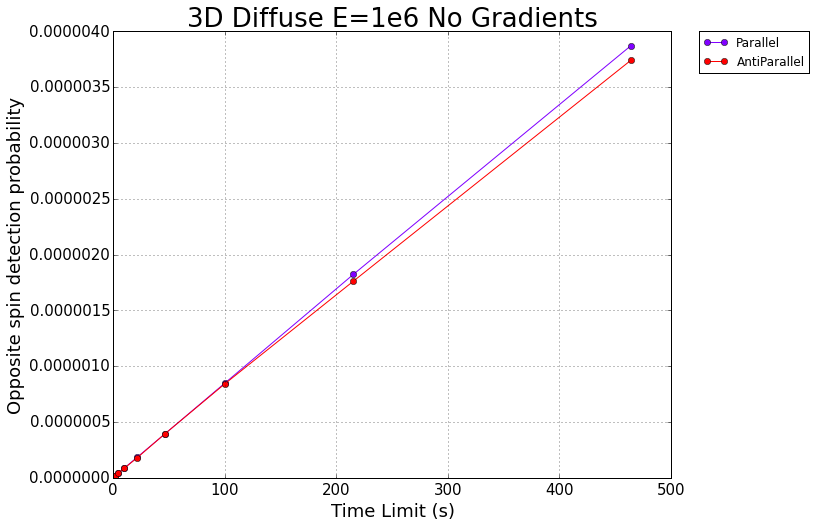

In [19]:
variable = 'TimeLimit'
main_title = '3D Diffuse E=1e6 No Gradients'
x_axis_title = r'Time Limit (s)'
lambda_func=[lambda x:x,lambda x:x,lambda x:x,lambda x:x]
lines = [range(5571, 5581)]

for i in range(len(plot_types)):
    plot_type=plot_types[i]
    y_axis_title=y_axis_titles[i]
    data=[]
    for config_type in ['Par',"Anti"]:
        full_plot_type=config_type + "_" +plot_type
        titles=[main_title,x_axis_title,y_axis_title]
        data += srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
    srkgraphics.make_plot_from_data(data, titles=titles, legend_titles=legend_titles,lambda_func=lambda_func)
#     plt.yscale('log', noncvposy='clip')
#     plt.xscale('log', noncvposy='clip')
    plt.savefig("/home/mjbales/work/nedm/graphs/MassRuns151103"+plot_type+"vs"+variable+".svg", bbox_inches='tight')
    plt.show()
                        


##Vary Step Size Limit

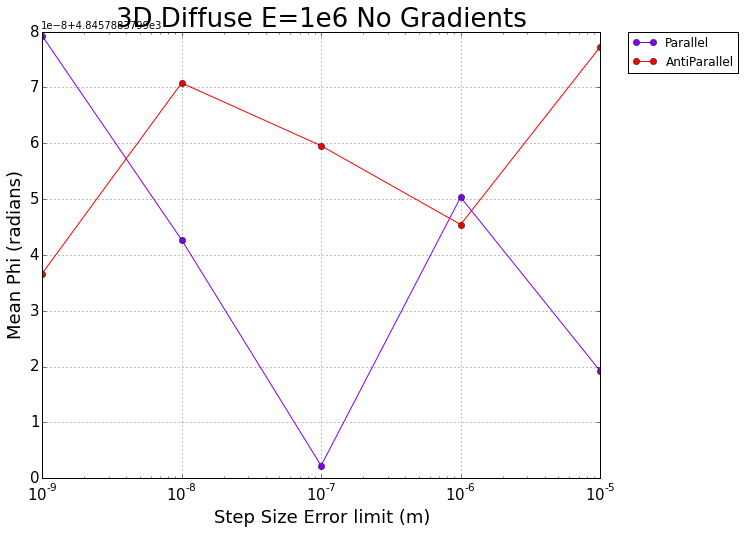

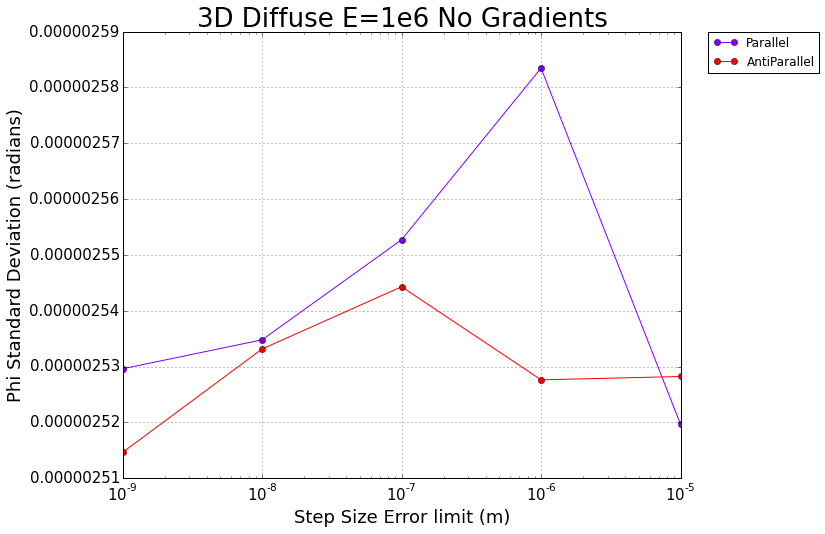

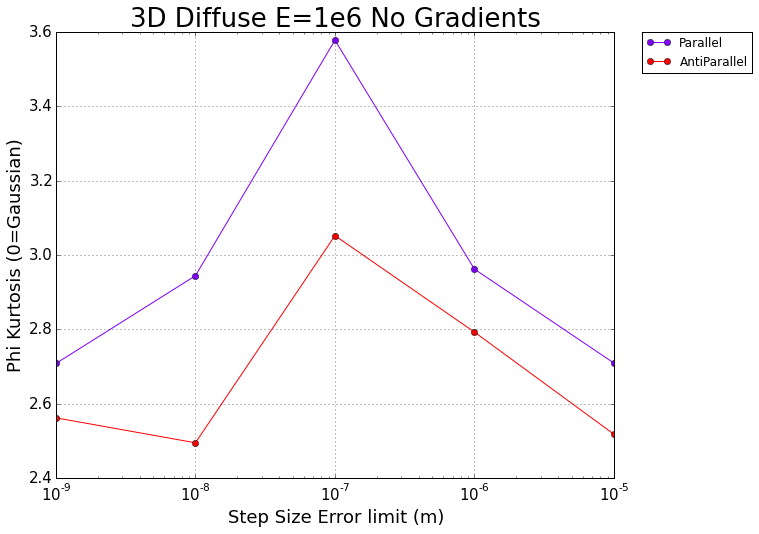

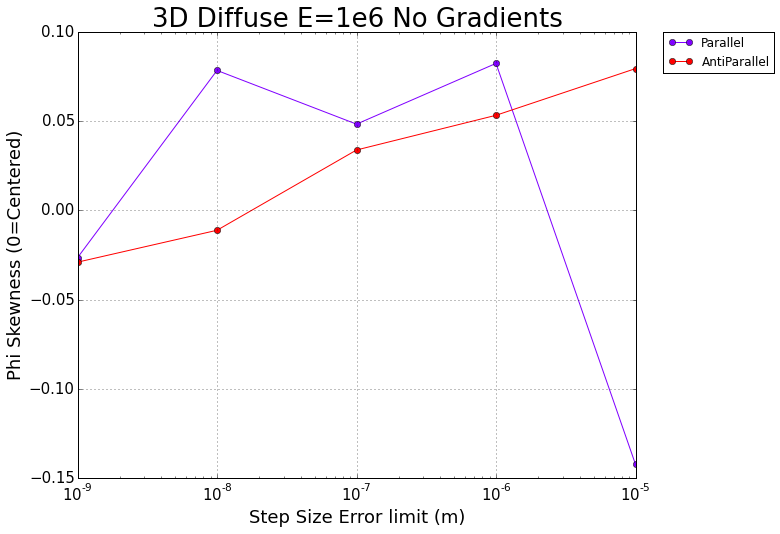

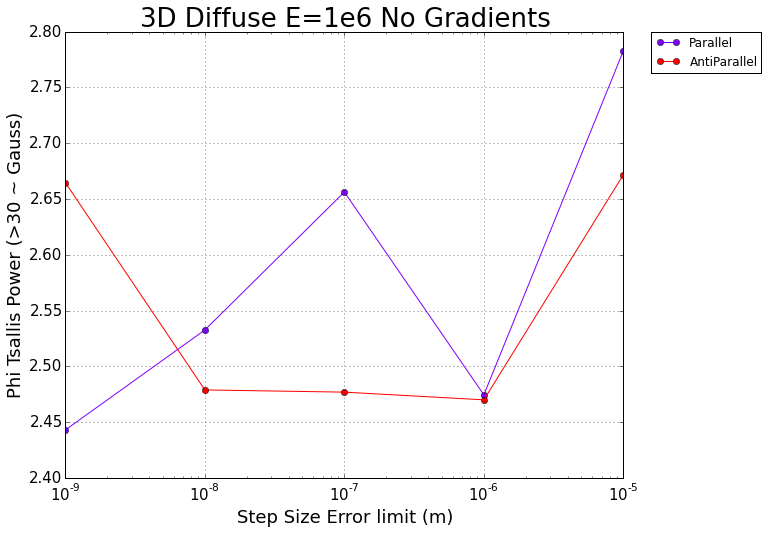

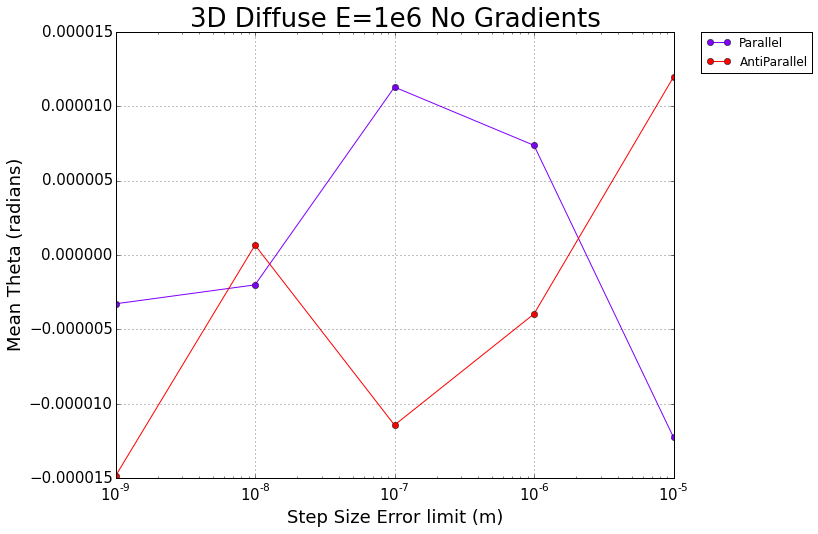

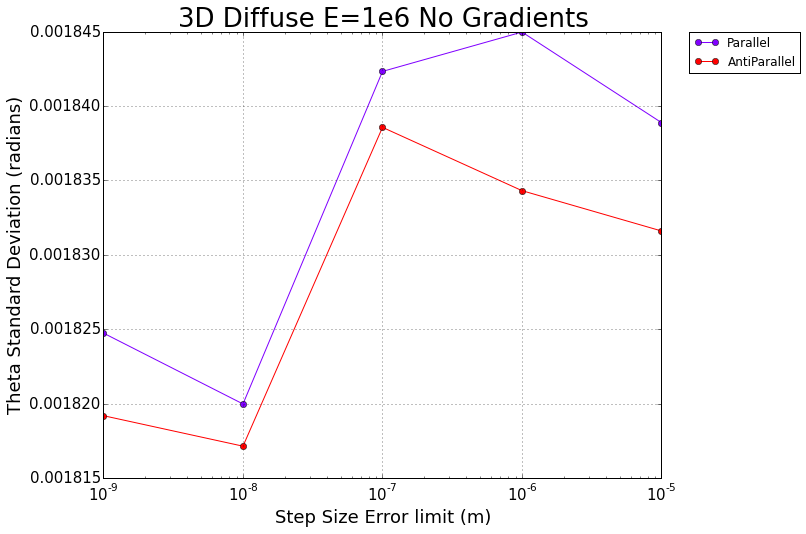

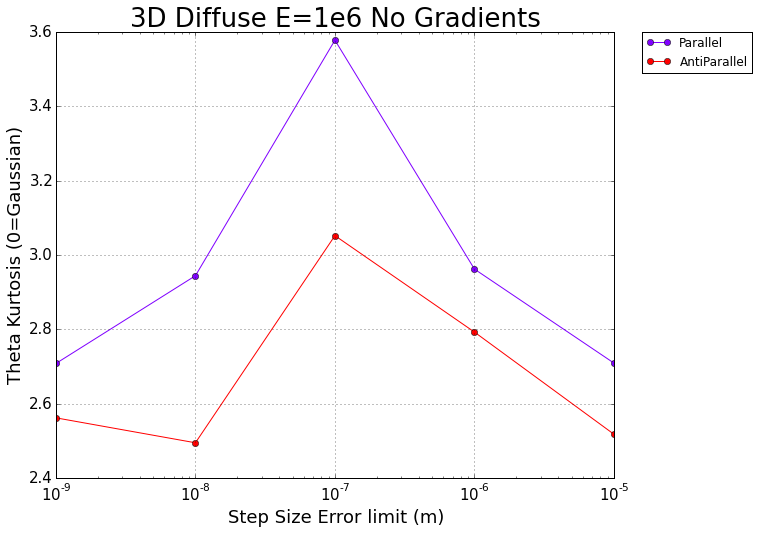

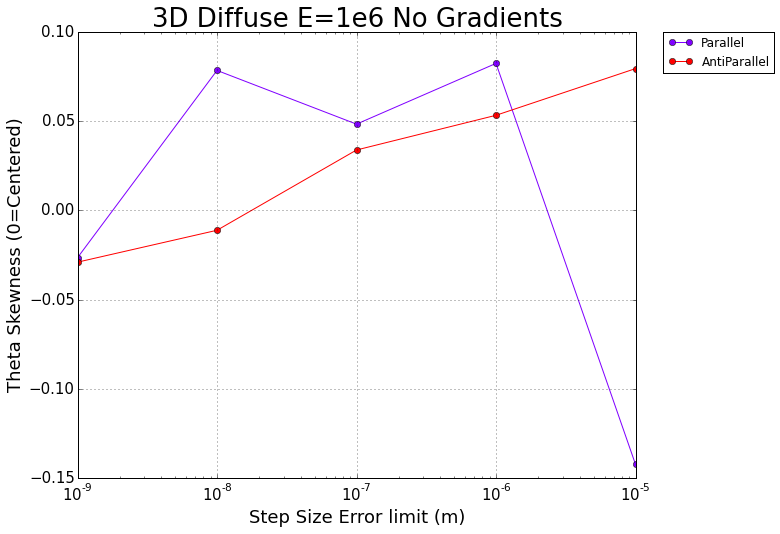

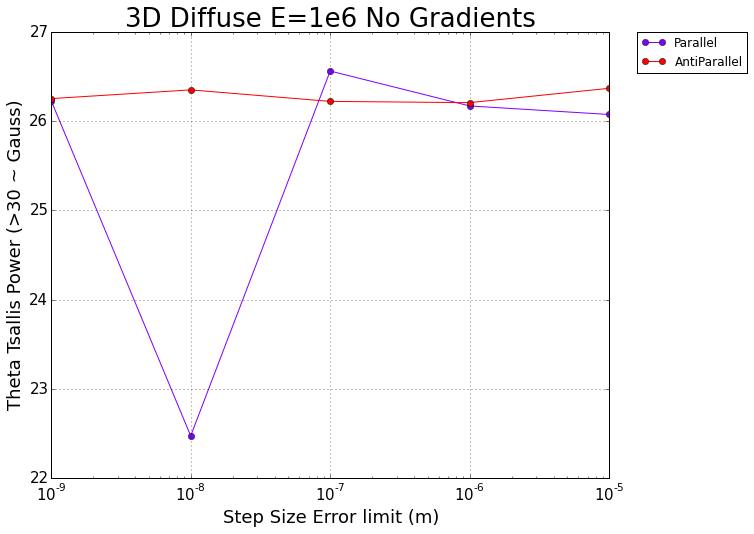

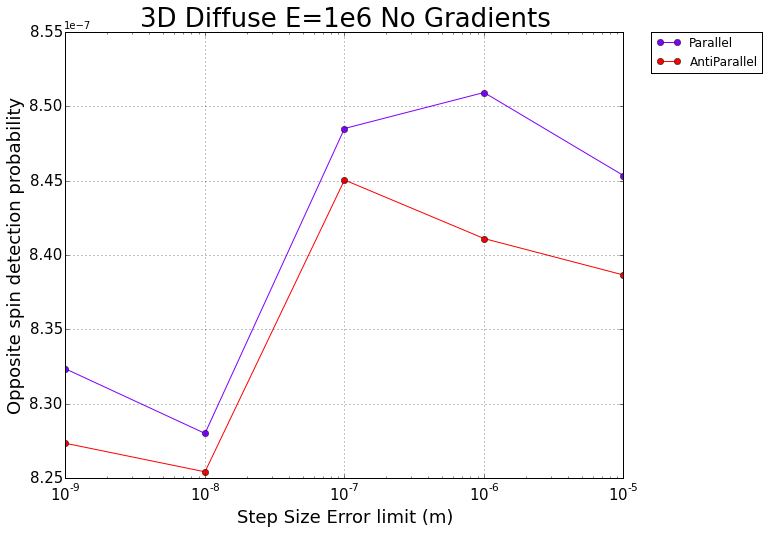

In [21]:
variable = 'EPSAbs'
main_title = '3D Diffuse E=1e6 No Gradients'
x_axis_title = r'Step Size Error limit (m)'
lambda_func=[lambda x:x,lambda x:x,lambda x:x,lambda x:x]
lines = [range(5581, 5586)]

for i in range(len(plot_types)):
    plot_type=plot_types[i]
    y_axis_title=y_axis_titles[i]
    data=[]
    for config_type in ['Par',"Anti"]:
        full_plot_type=config_type + "_" +plot_type
        titles=[main_title,x_axis_title,y_axis_title]
        data += srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
    srkgraphics.make_plot_from_data(data, titles=titles, legend_titles=legend_titles,lambda_func=lambda_func)
#     plt.yscale('log', noncvposy='clip')
    plt.xscale('log', noncvposy='clip')
    plt.savefig("/home/mjbales/work/nedm/graphs/MassRuns151103"+plot_type+"vs"+variable+".svg", bbox_inches='tight')
    plt.show()
                        


##Vary Velocity

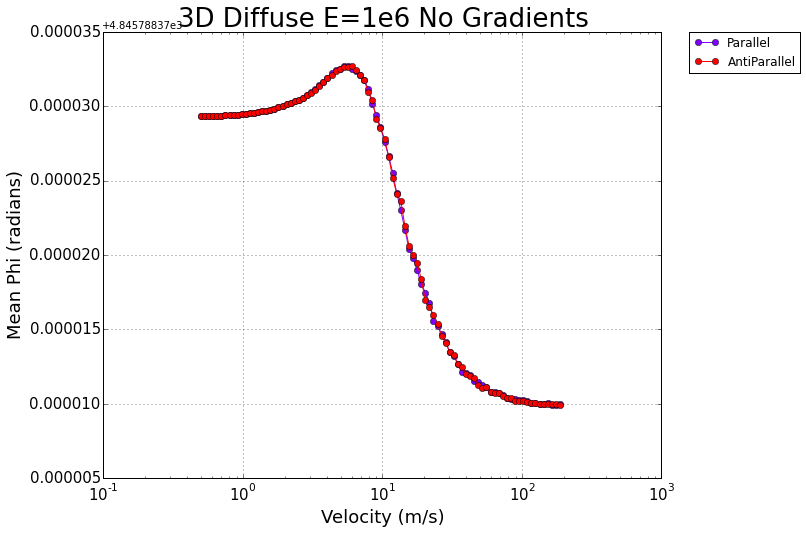

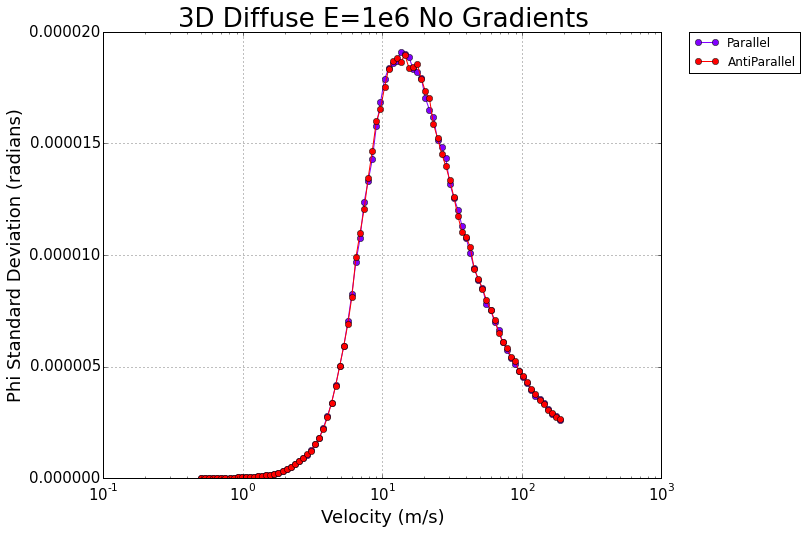

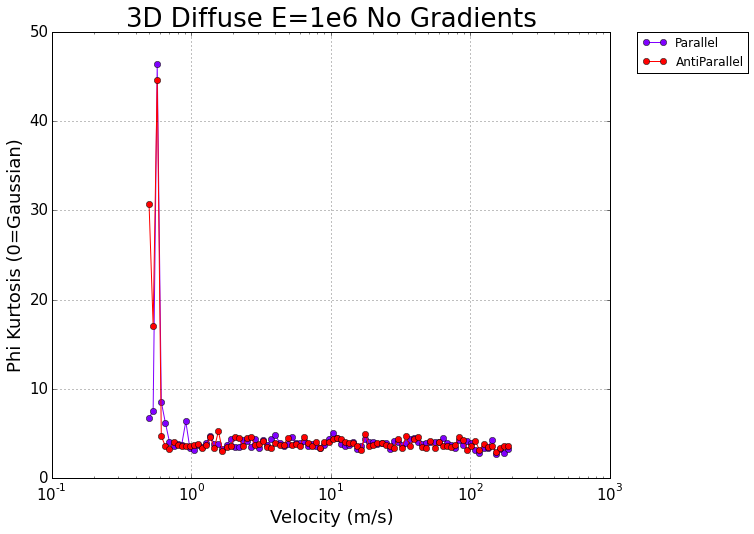

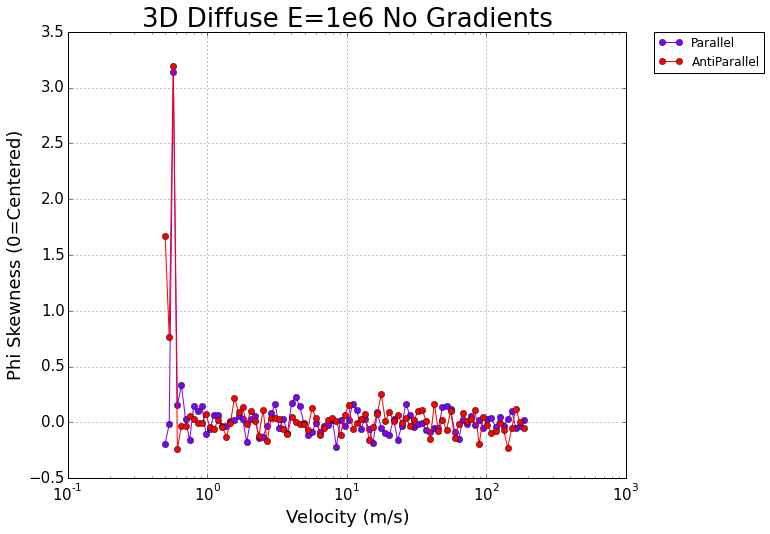

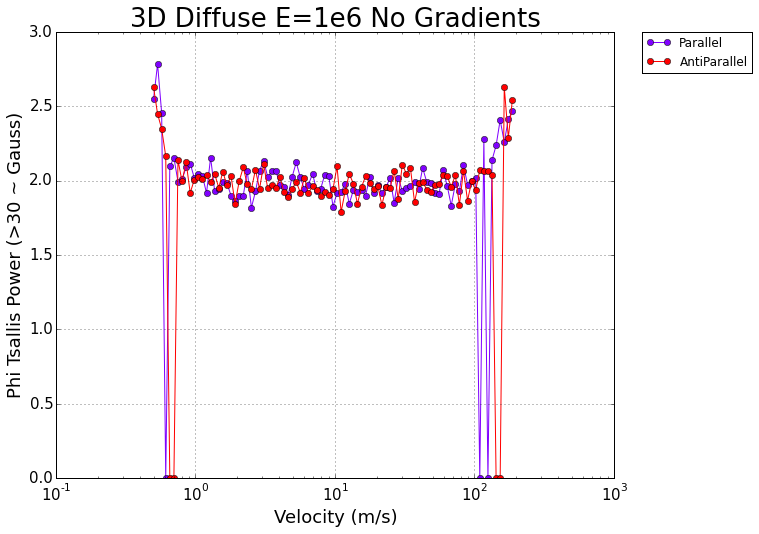

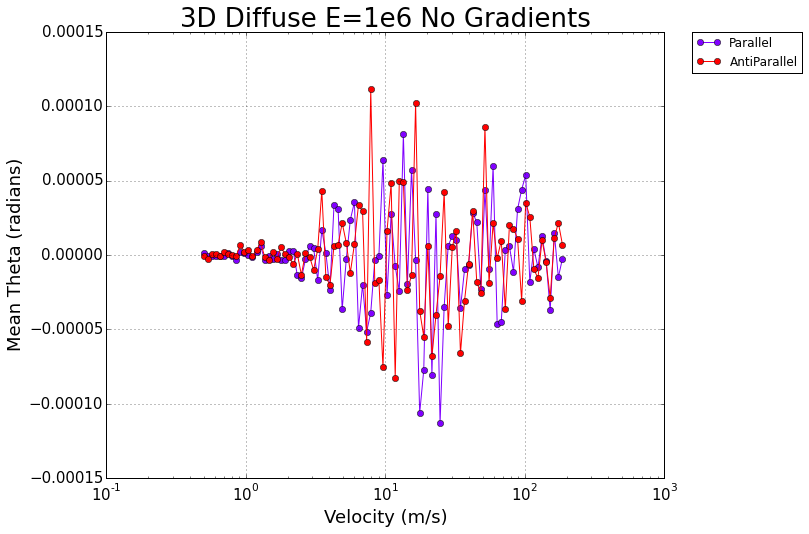

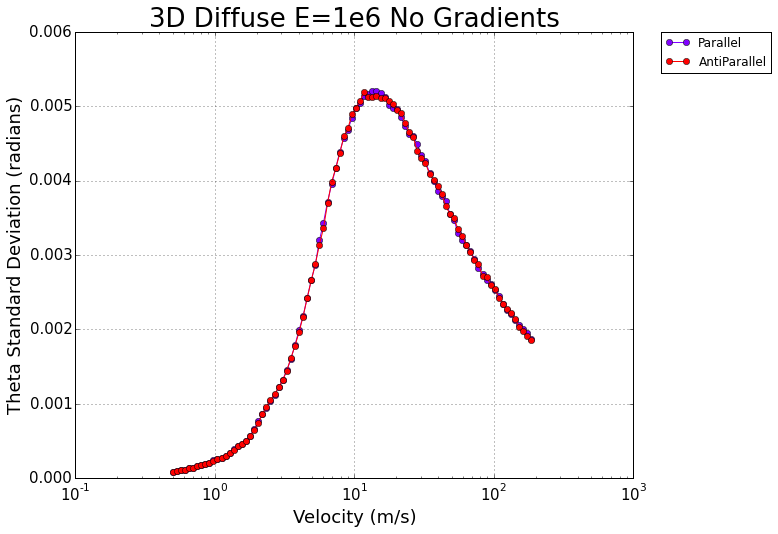

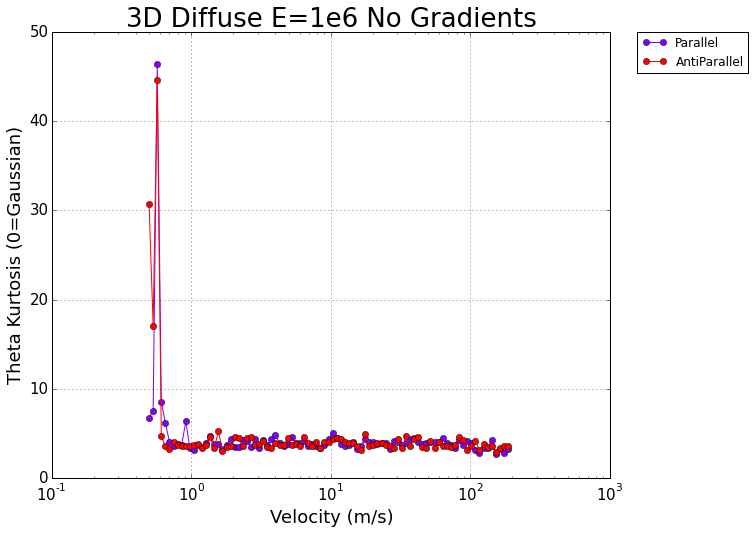

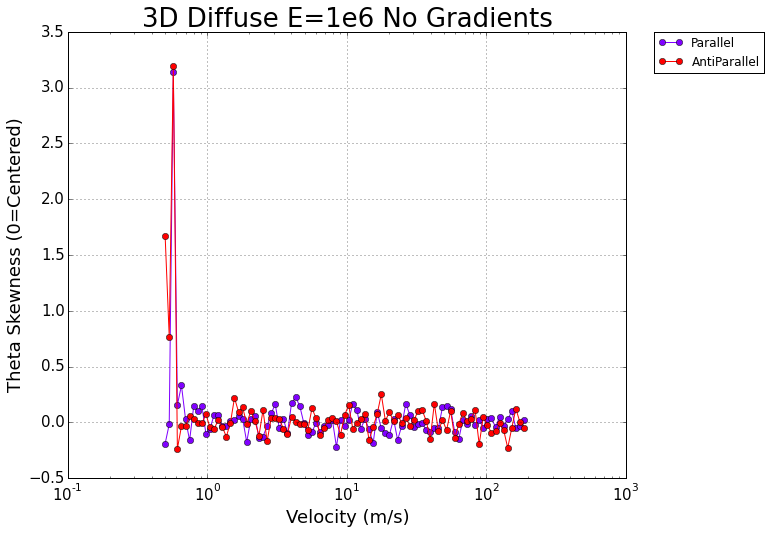

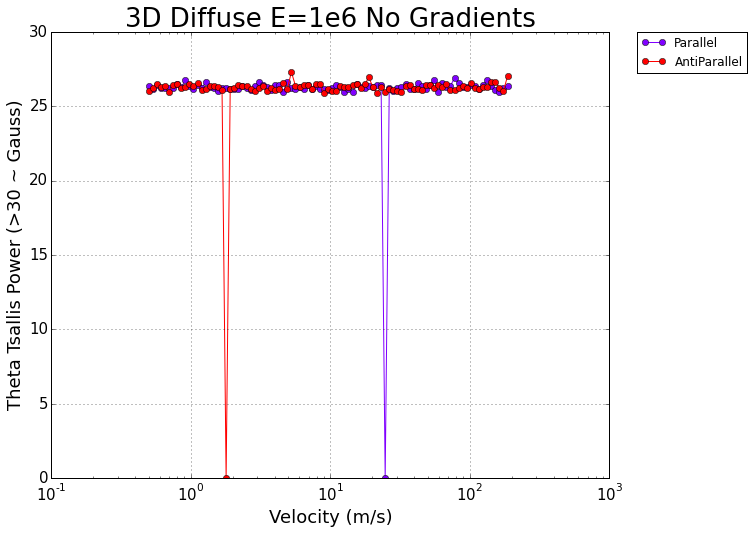

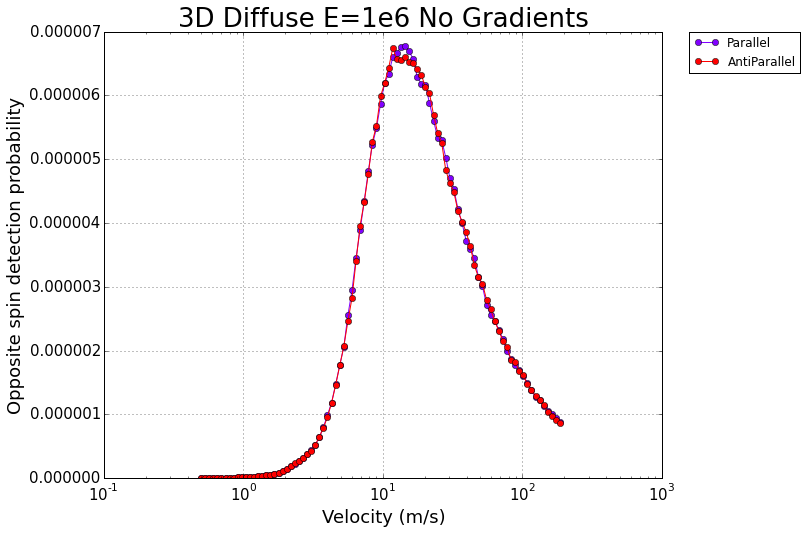

In [22]:
variable = 'MeanVel'
main_title = '3D Diffuse E=1e6 No Gradients'
x_axis_title = r'Velocity (m/s)'
lambda_func=[lambda x:x,lambda x:x,lambda x:x,lambda x:x]
lines = [range(5586, 5676)]

for i in range(len(plot_types)):
    plot_type=plot_types[i]
    y_axis_title=y_axis_titles[i]
    data=[]
    for config_type in ['Par',"Anti"]:
        full_plot_type=config_type + "_" +plot_type
        titles=[main_title,x_axis_title,y_axis_title]
        data += srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
    srkgraphics.make_plot_from_data(data, titles=titles, legend_titles=legend_titles,lambda_func=lambda_func)
#     plt.yscale('log', noncvposy='clip')
    plt.xscale('log', noncvposy='clip')
    plt.savefig("/home/mjbales/work/nedm/graphs/MassRuns151103"+plot_type+"vs"+variable+".svg", bbox_inches='tight')
    plt.show()
                        


##Vary Omega (by velocity)

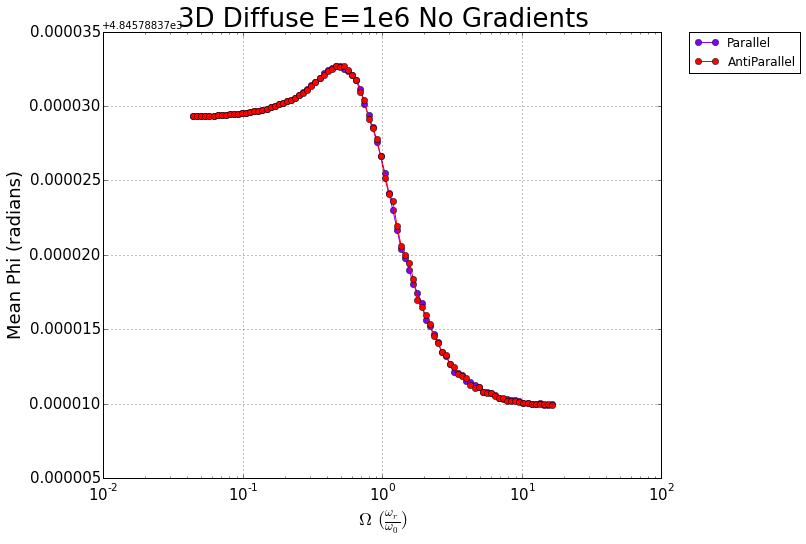

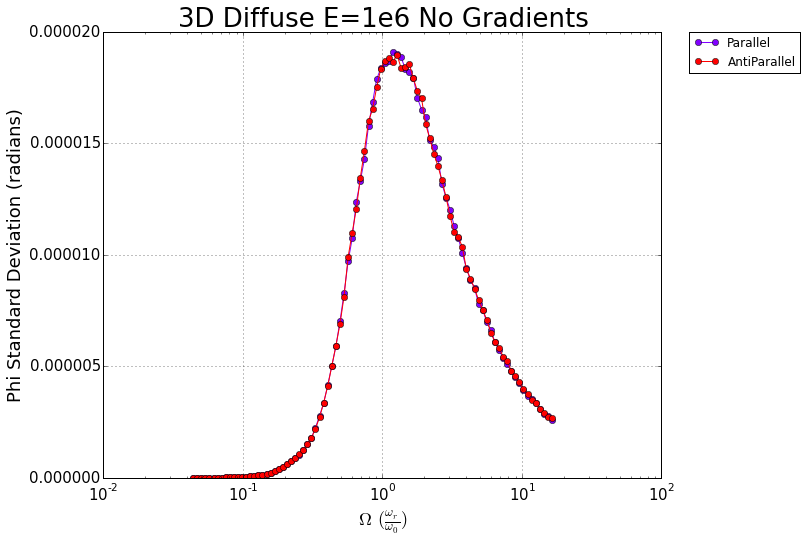

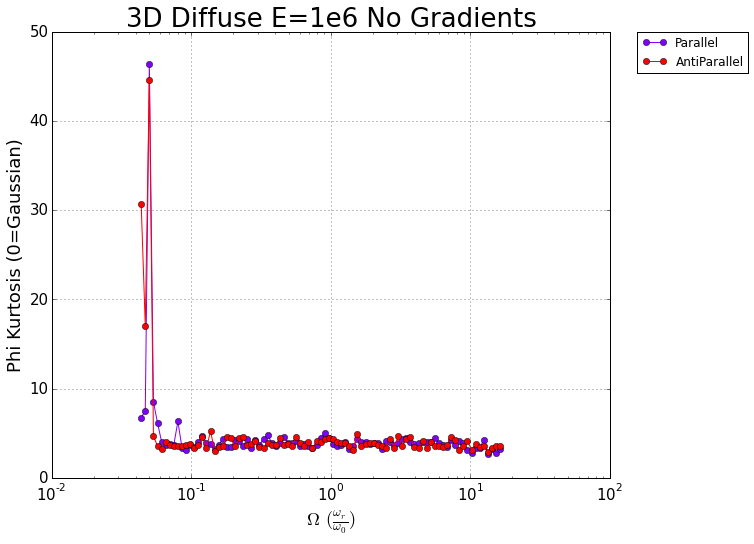

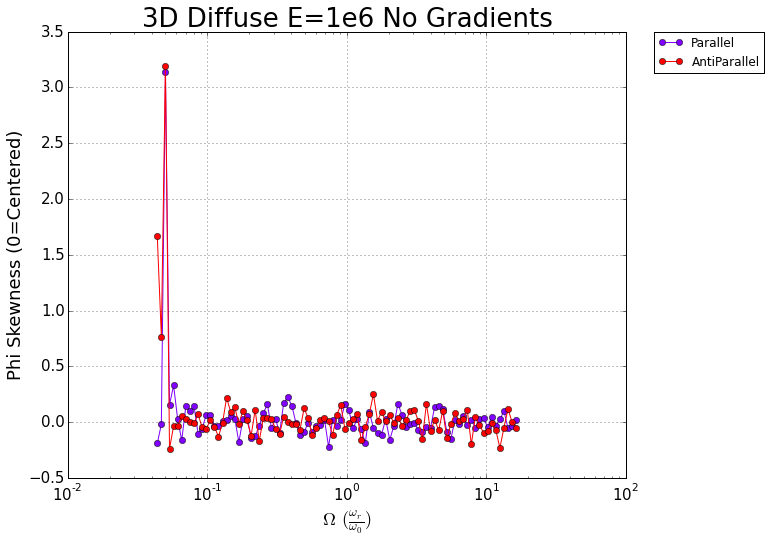

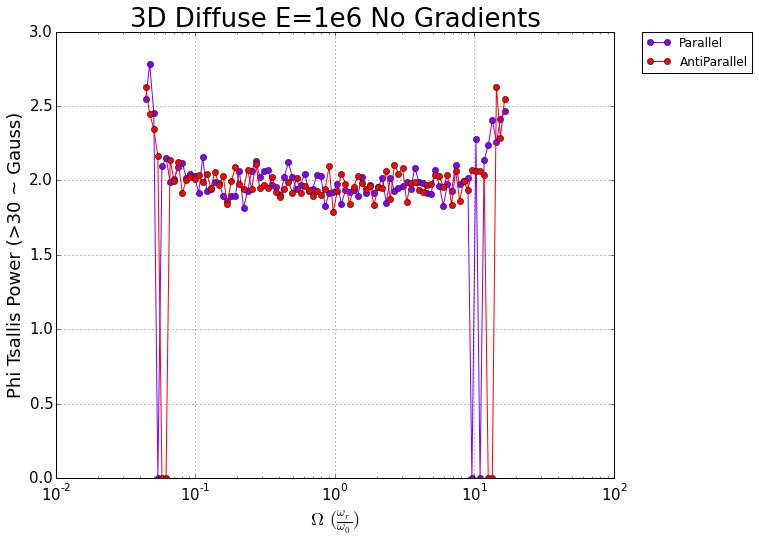

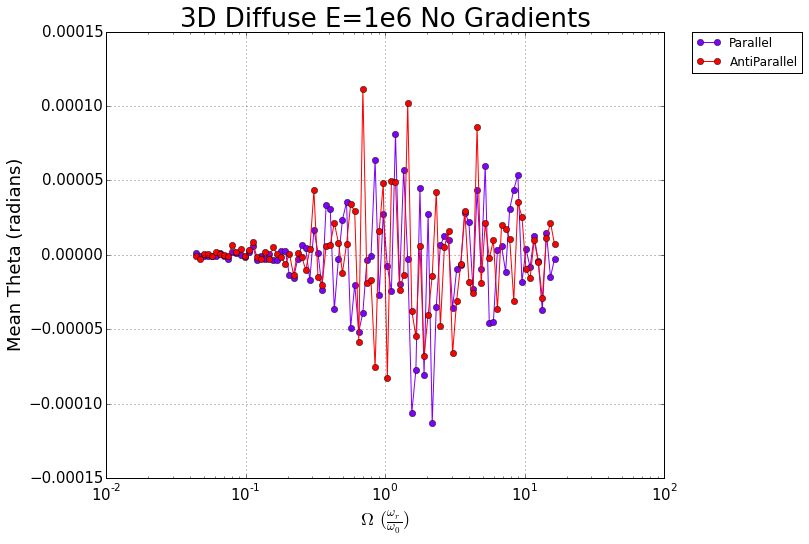

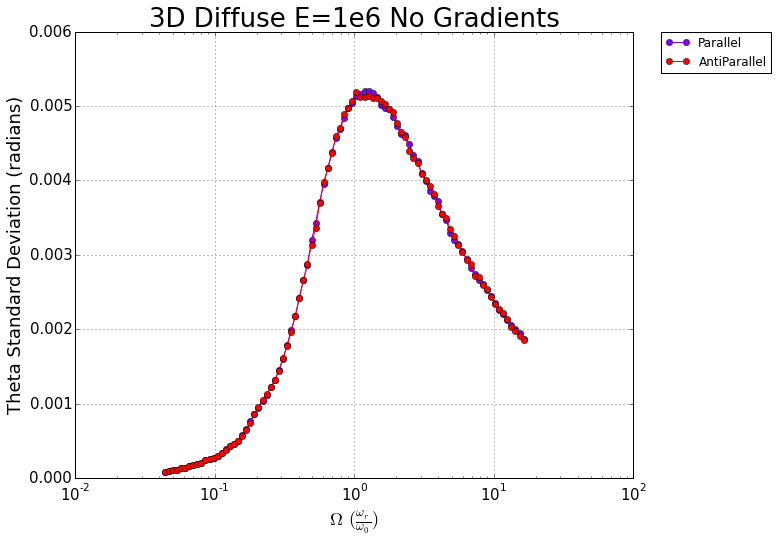

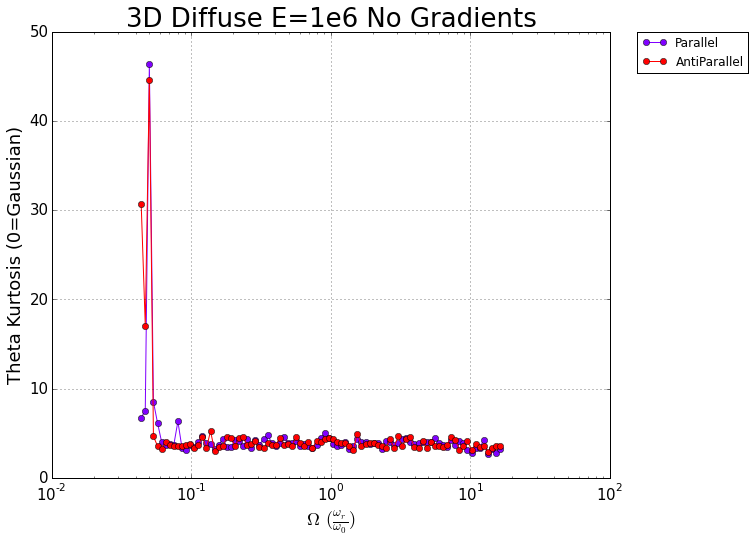

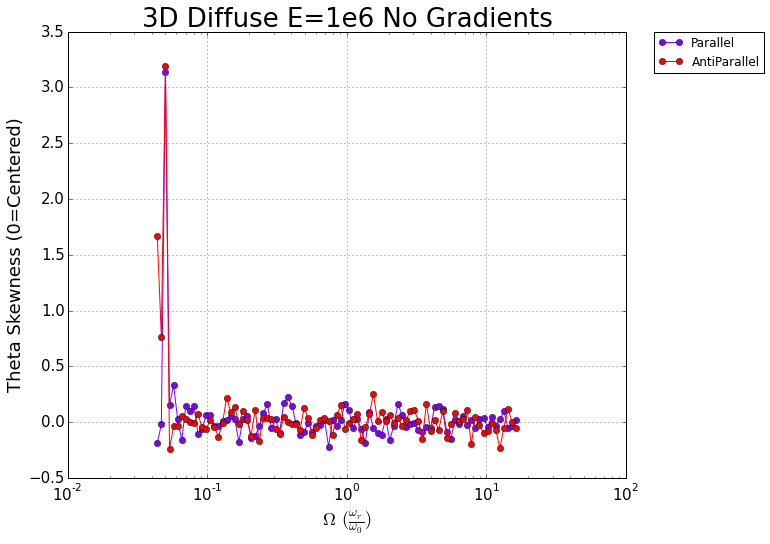

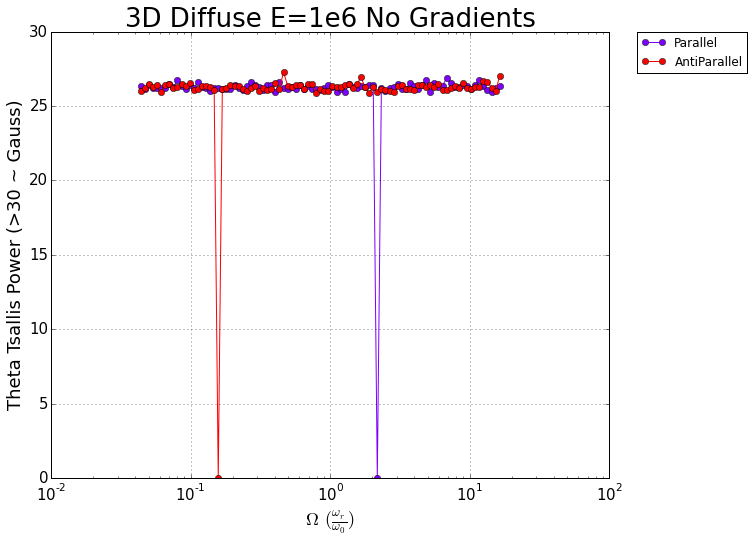

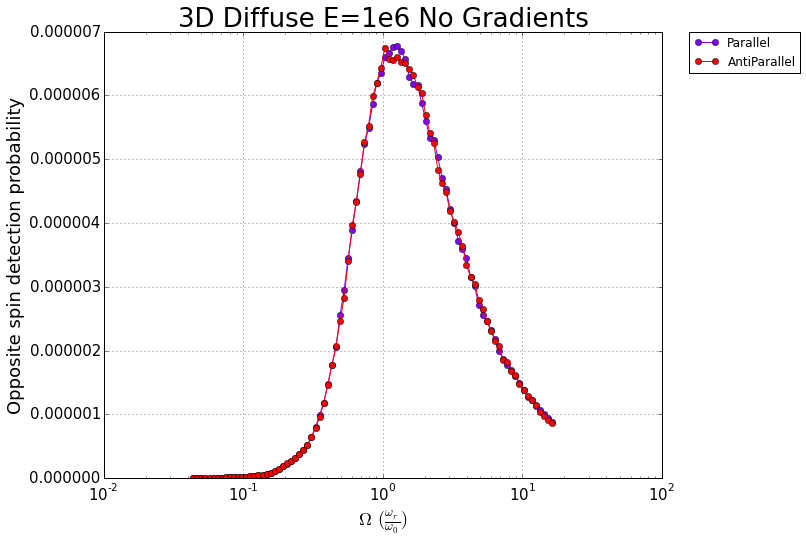

In [7]:
variable = 'MeanVel'
main_title = '3D Diffuse E=1e6 No Gradients'
x_axis_title = r'$\Omega\,(\frac{\omega_r}{\omega_0})$'
lambda_func=[lambda x:x/(0.235*4.84578839927e7*1e-6),lambda x:x,lambda x:x,lambda x:x]
lines = [range(5586, 5676)]

for i in range(len(plot_types)):
    plot_type=plot_types[i]
    y_axis_title=y_axis_titles[i]
    data=[]
    for config_type in ['Par',"Anti"]:
        full_plot_type=config_type + "_" +plot_type
        titles=[main_title,x_axis_title,y_axis_title]
        data += srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
    srkgraphics.make_plot_from_data(data, titles=titles, legend_titles=legend_titles,lambda_func=lambda_func)
#     plt.yscale('log', noncvposy='clip')
    plt.xscale('log', noncvposy='clip')
    plt.savefig("/home/mjbales/work/nedm/graphs/MassRuns151103"+plot_type+"vs"+variable+".svg", bbox_inches='tight')
    plt.show()
                        


##Vary Omega (by magnetic field)

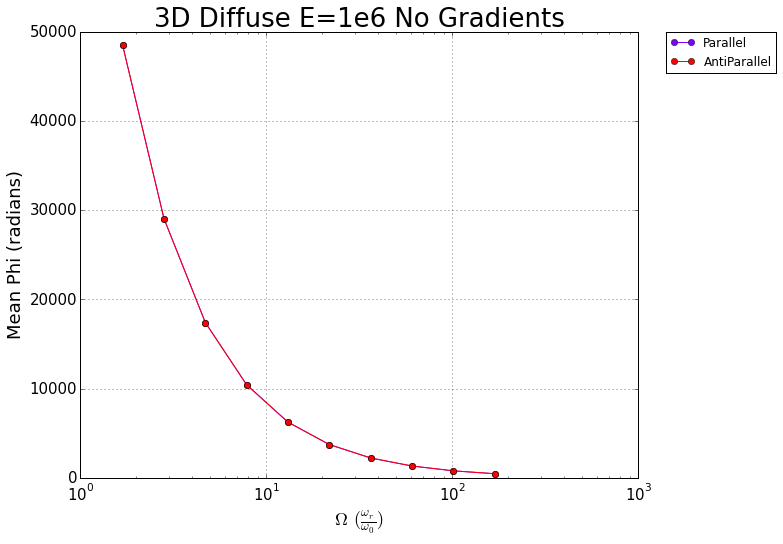

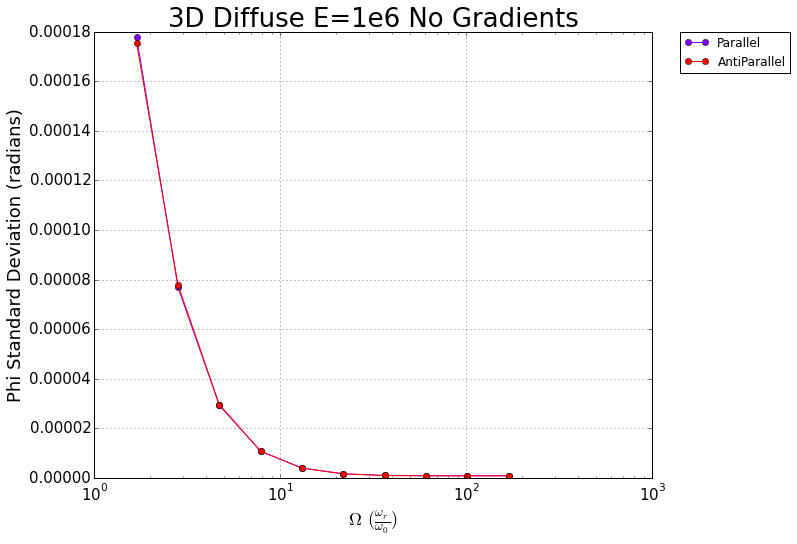

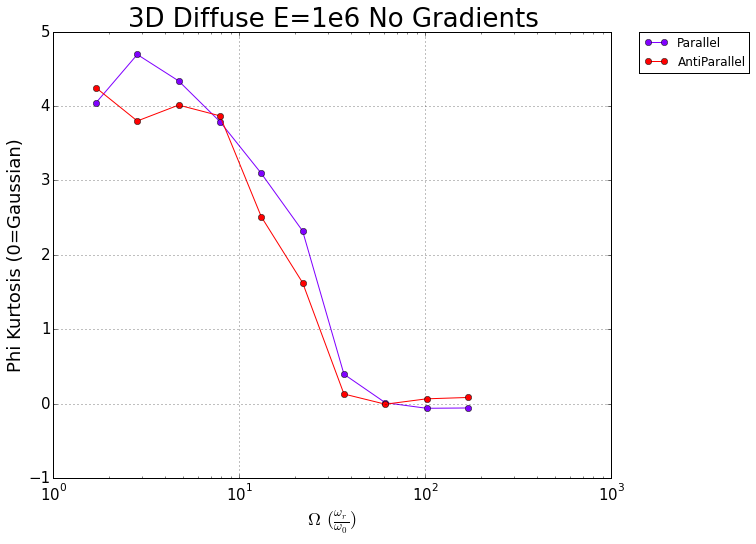

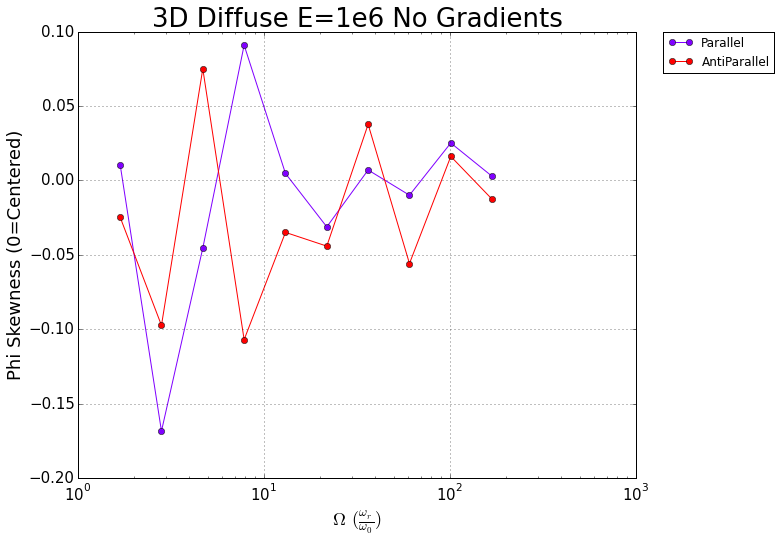

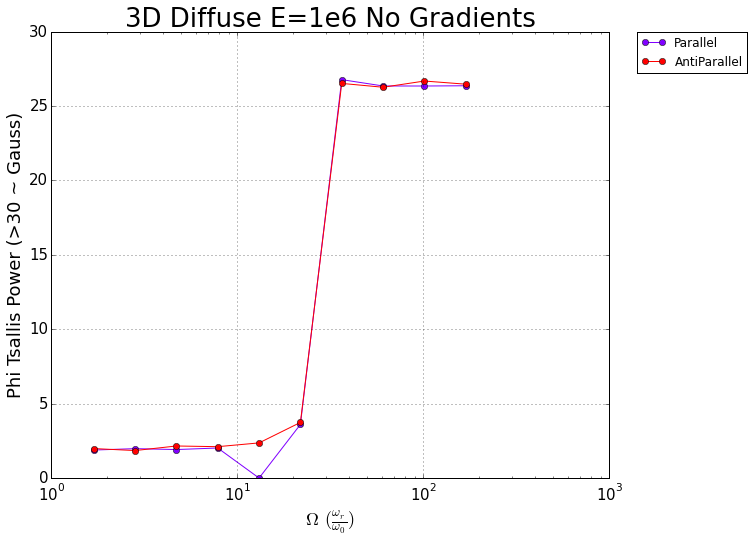

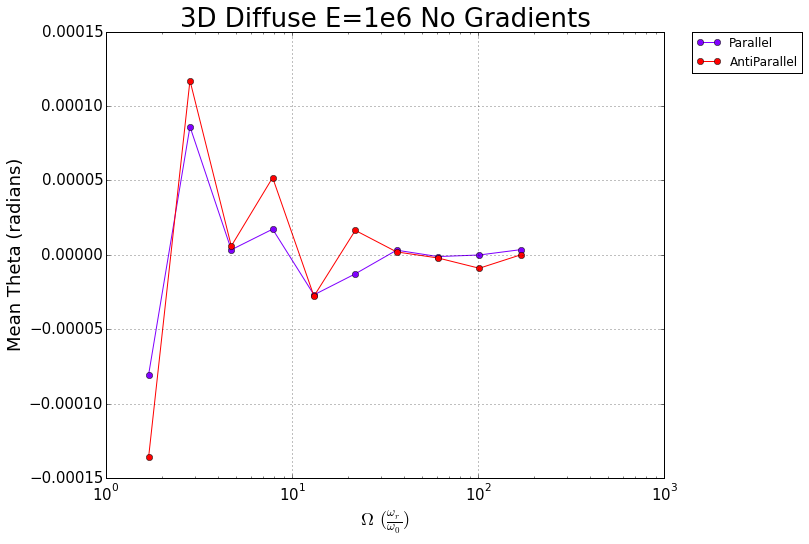

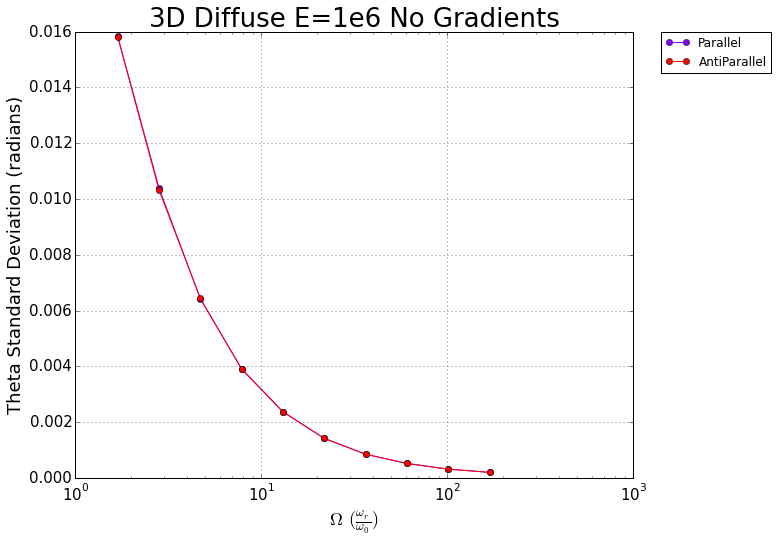

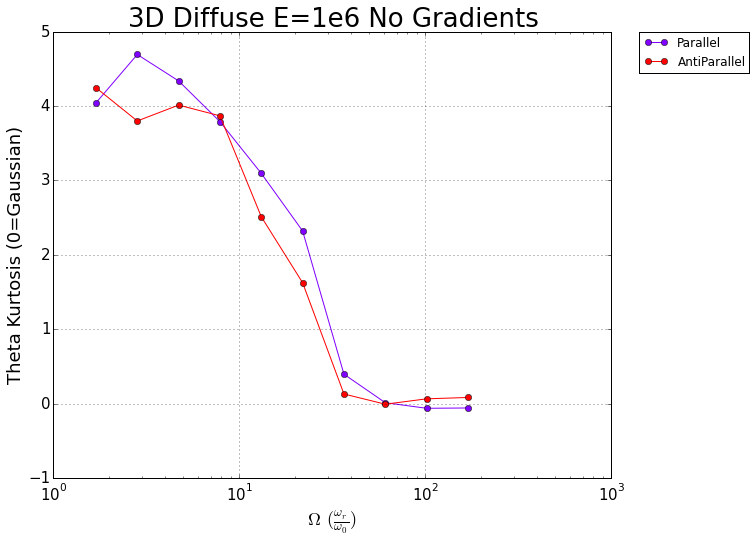

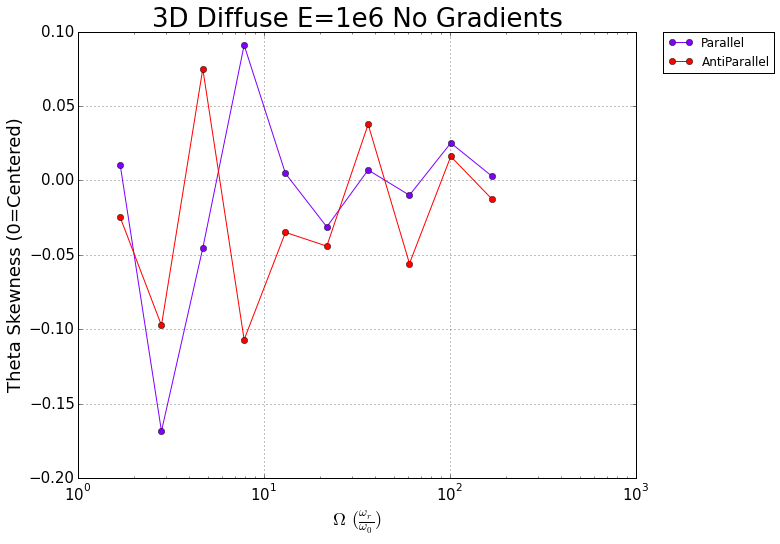

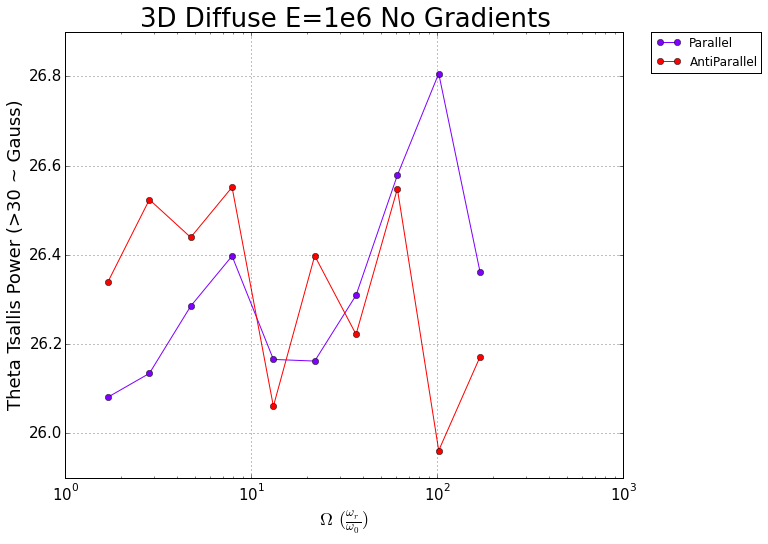

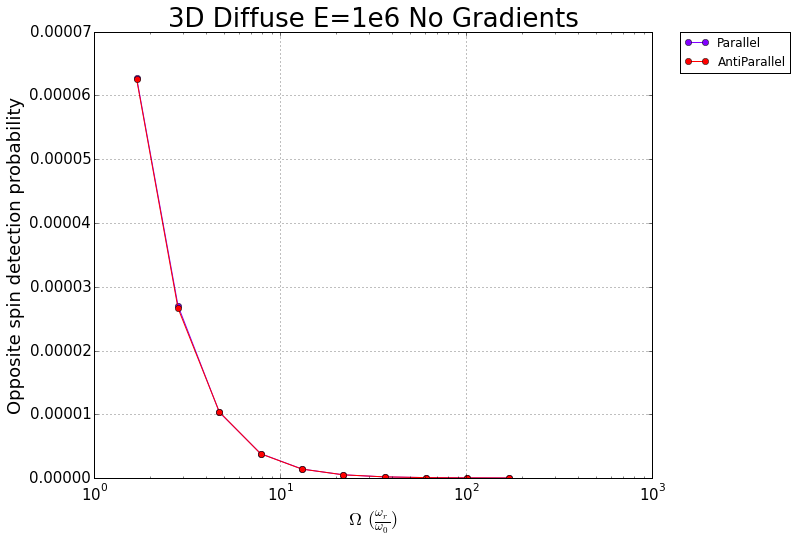

In [9]:
variable = 'B0FieldStrength'
main_title = '3D Diffuse E=1e6 No Gradients'
x_axis_title = r'$\Omega\,(\frac{\omega_r}{\omega_0})$'
lambda_func=[lambda x:193/(0.235*4.84578839927e7*x),lambda x:x,lambda x:x,lambda x:x]
lines = [range(5551, 5561)]

for i in range(len(plot_types)):
    plot_type=plot_types[i]
    y_axis_title=y_axis_titles[i]
    data=[]
    for config_type in ['Par',"Anti"]:
        full_plot_type=config_type + "_" +plot_type
        titles=[main_title,x_axis_title,y_axis_title]
        data += srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
    srkgraphics.make_plot_from_data(data, titles=titles, legend_titles=legend_titles,lambda_func=lambda_func)
#     plt.yscale('log', noncvposy='clip')
    plt.xscale('log', noncvposy='clip')
    plt.savefig("/home/mjbales/work/nedm/graphs/MassRuns151103"+plot_type+"vs"+variable+".svg", bbox_inches='tight')
    plt.show()
                        


###Vary Temperature

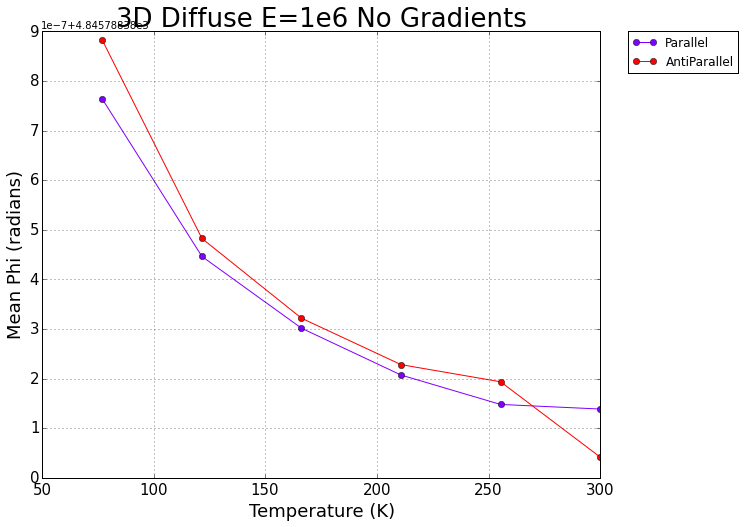

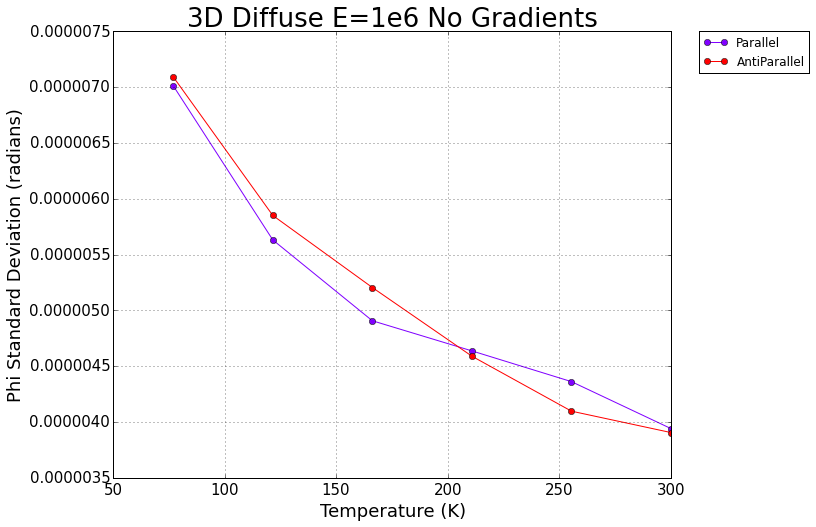

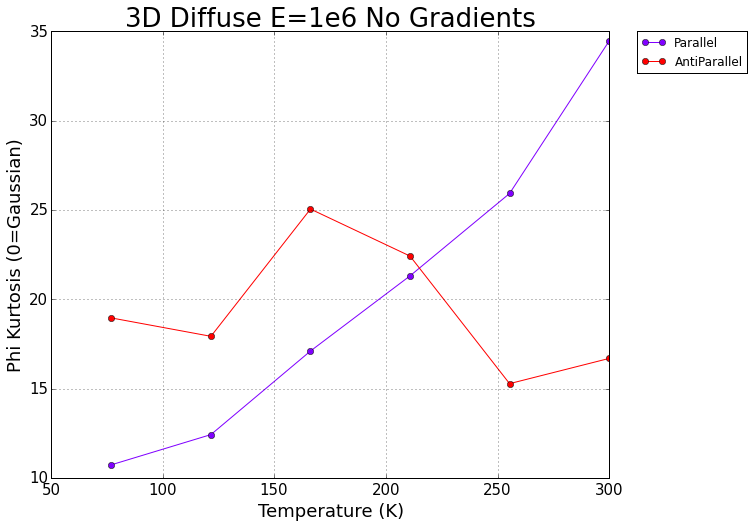

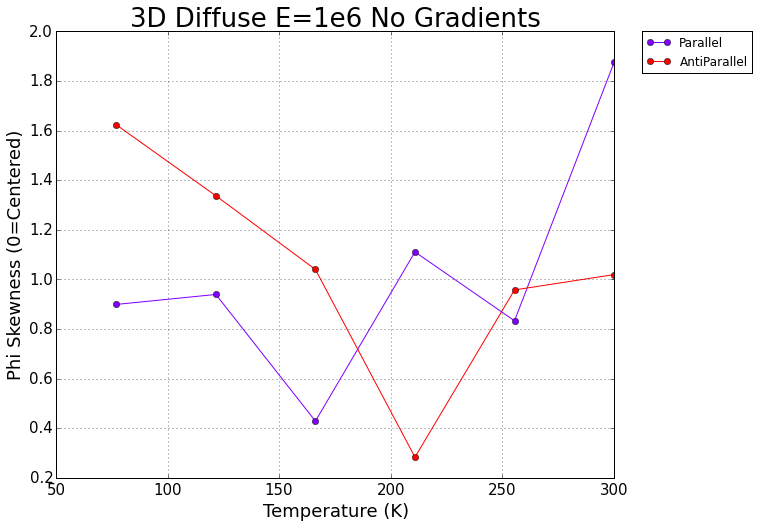

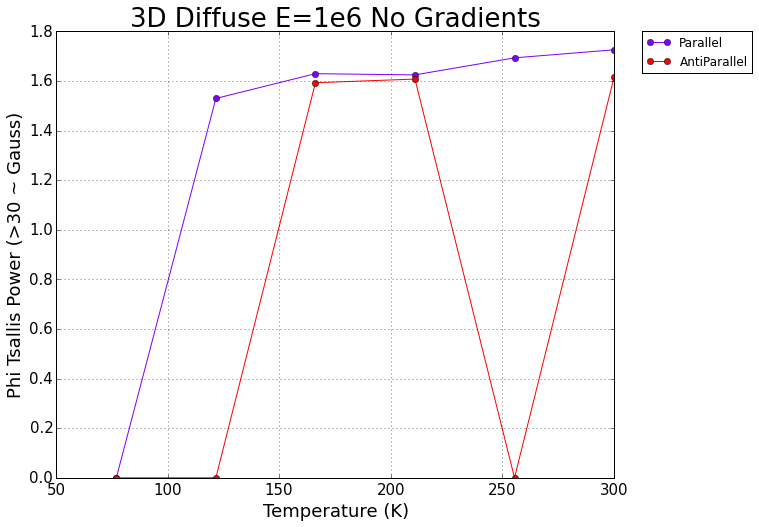

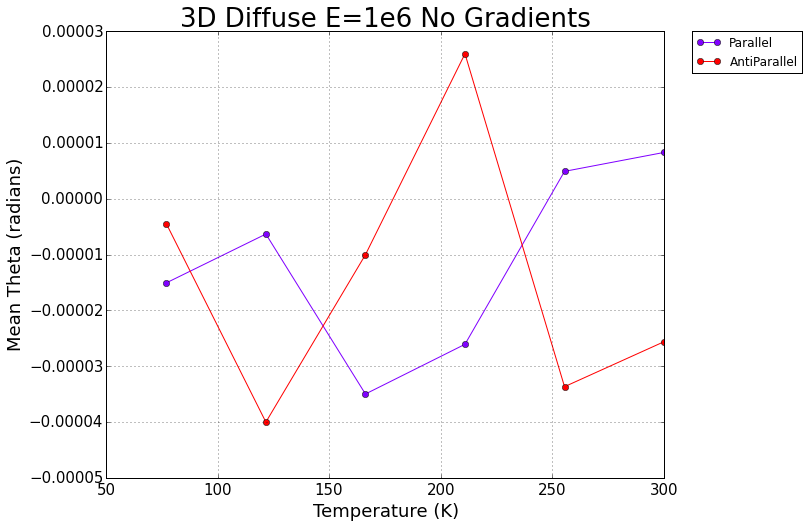

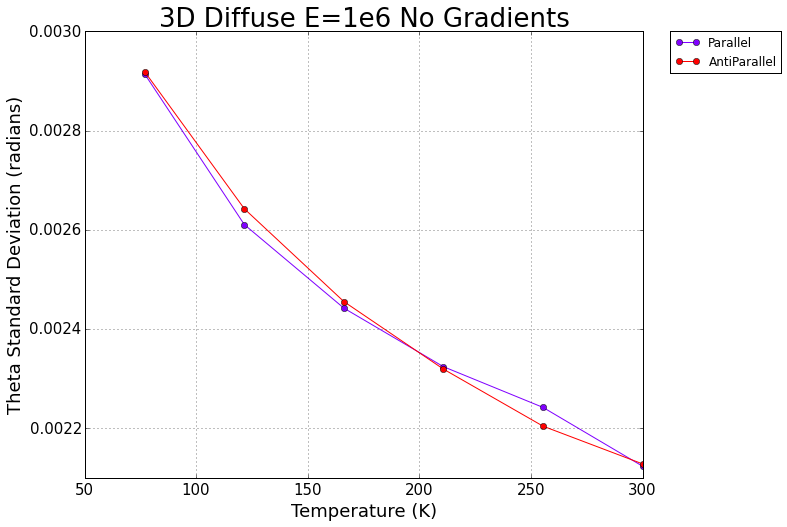

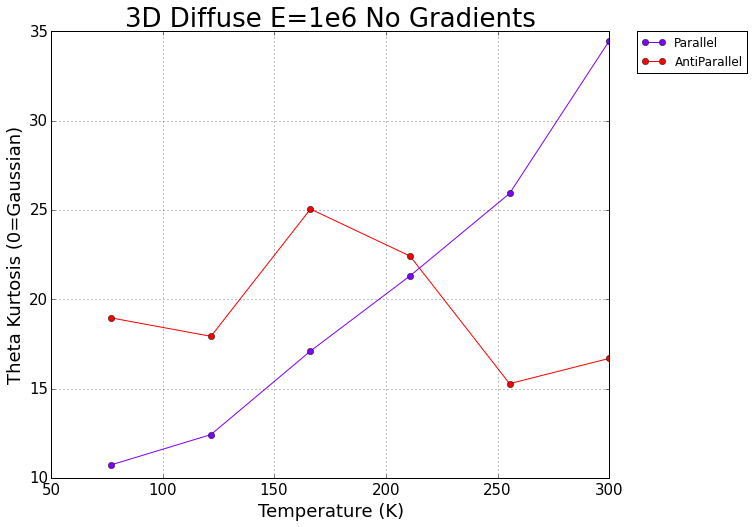

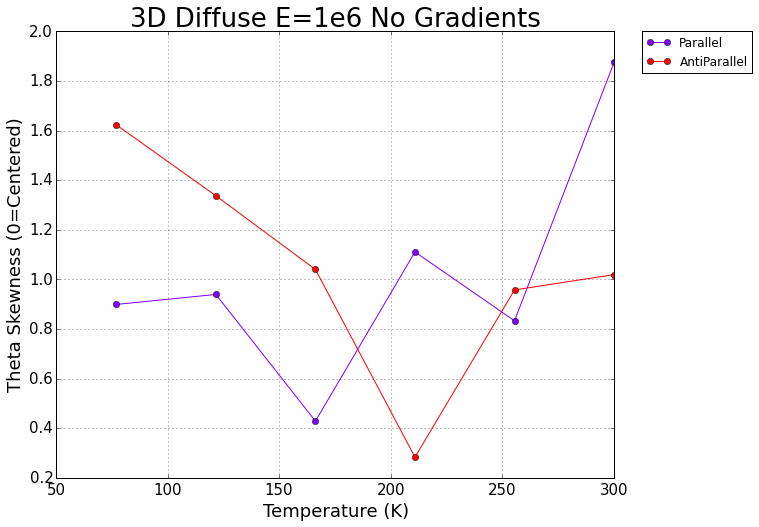

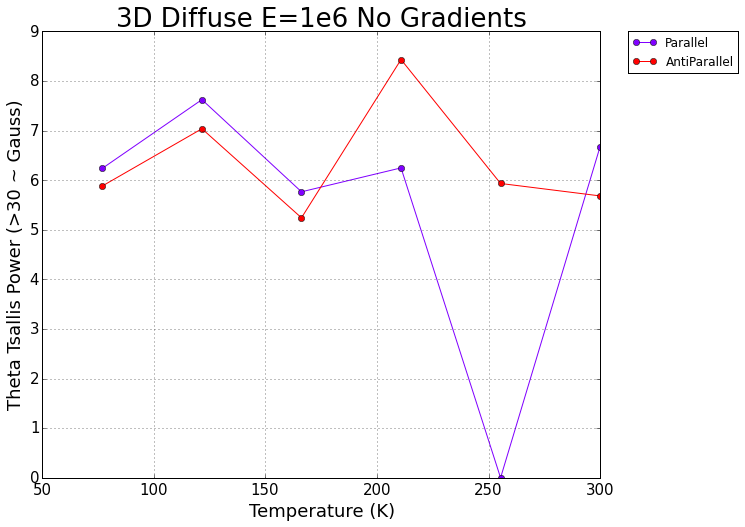

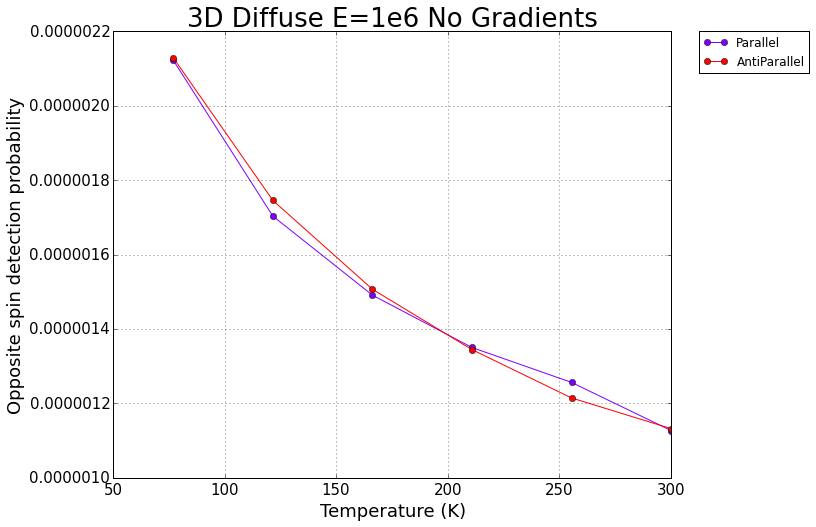

In [5]:
variable = 'VelProfHistPath'
main_title = '3D Diffuse E=1e6 No Gradients'
x_axis_title = r'Temperature (K)'
lambda_func=[lambda x:float(x[1:]),lambda x:x,lambda x:x,lambda x:x]
lines = [range(5842, 5848)]

for i in range(len(plot_types)):
    plot_type=plot_types[i]
    y_axis_title=y_axis_titles[i]
    data=[]
    for config_type in ['Par',"Anti"]:
        full_plot_type=config_type + "_" +plot_type
        titles=[main_title,x_axis_title,y_axis_title]
        data += srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
    srkgraphics.make_plot_from_data(data, titles=titles, legend_titles=legend_titles,lambda_func=lambda_func)
#     plt.yscale('log', noncvposy='clip')
#     plt.xscale('log', noncvposy='clip')
    plt.savefig("/home/mjbales/work/nedm/graphs/MassRuns151103"+plot_type+"vs"+"Temp"+".svg", bbox_inches='tight')
    plt.show()